In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [360]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Project - Customer Churn/Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')

In [361]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [362]:
print('The number of Rows is =',df.shape[0],'\n''The number of Columns is =',df.shape[1])

The number of Rows is = 11260 
The number of Columns is = 19


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [364]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [365]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [367]:
print("Number of duplicate rows:",df.duplicated().sum())

Number of duplicate rows: 0


In [368]:
pd.DataFrame(data = [df.kurtosis(), df.skew()], index=['Kurtosis','Skewness']).T.round(3)

,Kurtosis,Skewness
AccountID,-1.200,0.000
Churn,1.142,1.773
City_Tier,-1.398,0.737
CC_Contacted_LY,8.226,1.423
Service_Score,-0.668,0.004
CC_Agent_Score,-1.125,-0.142
Complain_ly,-1.096,0.951


<Axes: xlabel='Payment', ylabel='count'>

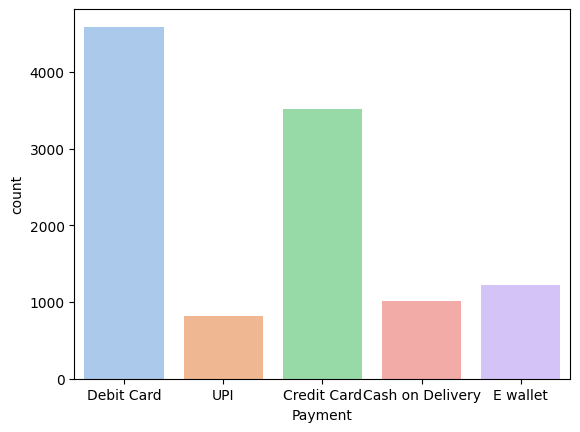

In [369]:
sns.countplot(x='Payment', data=df, palette='pastel')

<Axes: xlabel='Gender', ylabel='count'>

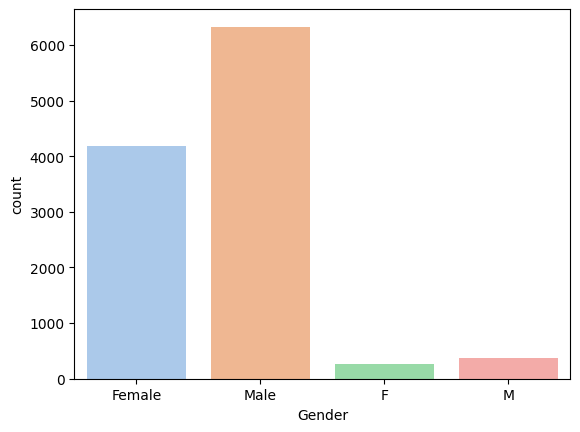

In [370]:
sns.countplot(x='Gender', data=df, palette='pastel')

<Axes: xlabel='City_Tier', ylabel='count'>

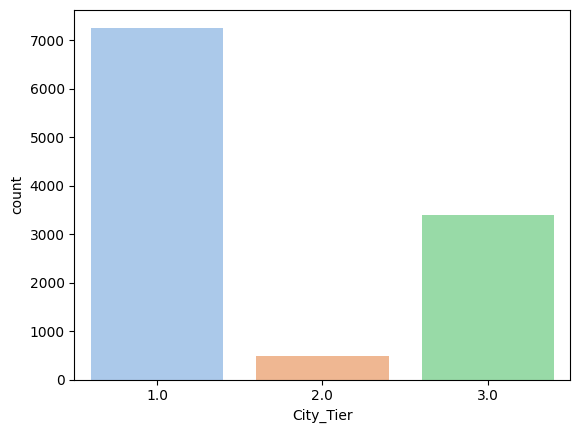

In [371]:
sns.countplot(x='City_Tier', data=df, palette='pastel')

<Axes: xlabel='Service_Score', ylabel='count'>

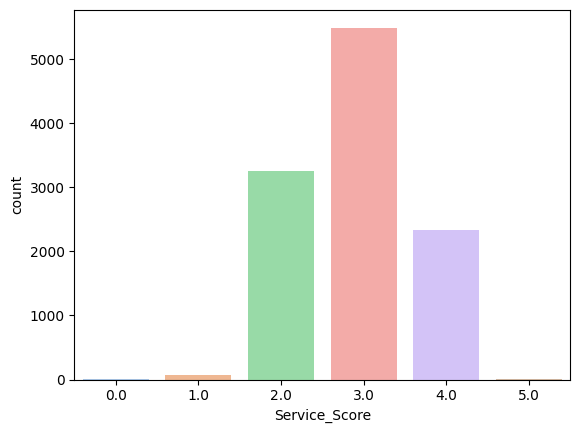

In [372]:
sns.countplot(x='Service_Score', data=df, palette='pastel')

<Axes: xlabel='Account_user_count', ylabel='count'>

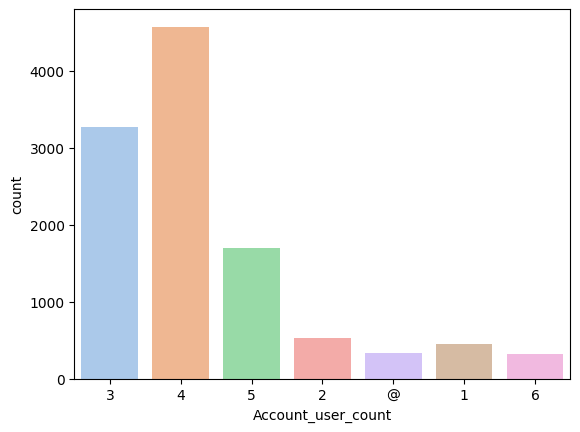

In [373]:
sns.countplot(x='Account_user_count', data=df, palette='pastel')

<Axes: xlabel='account_segment', ylabel='count'>

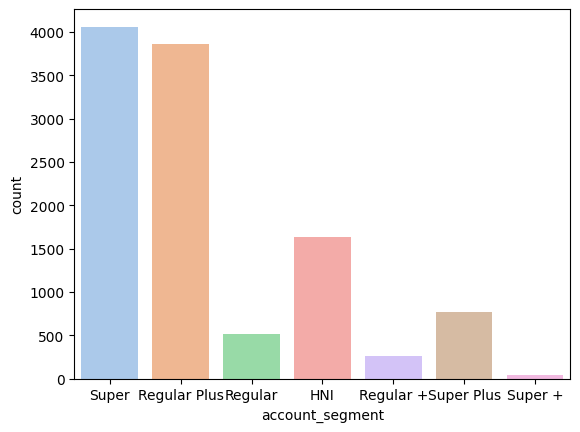

In [374]:
sns.countplot(x='account_segment', data=df, palette='pastel')

<Axes: xlabel='CC_Agent_Score', ylabel='count'>

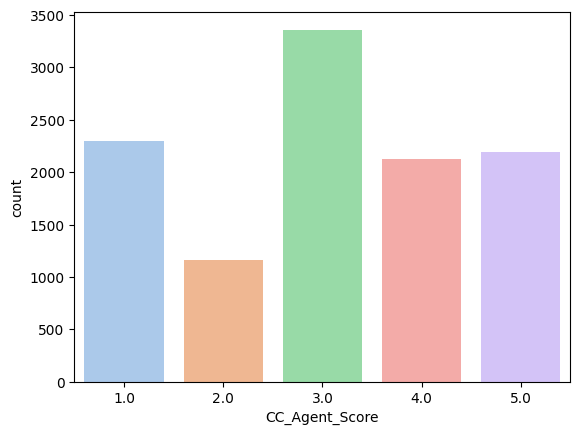

In [375]:
sns.countplot(x='CC_Agent_Score', data=df, palette='pastel')

<Axes: xlabel='Marital_Status', ylabel='count'>

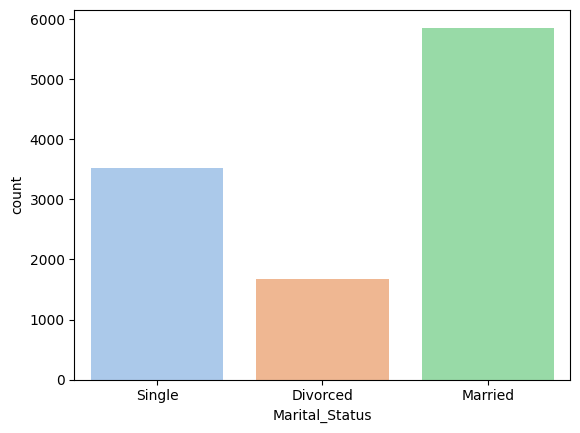

In [376]:
sns.countplot(x='Marital_Status', data=df, palette='pastel')

<Axes: xlabel='Complain_ly', ylabel='count'>

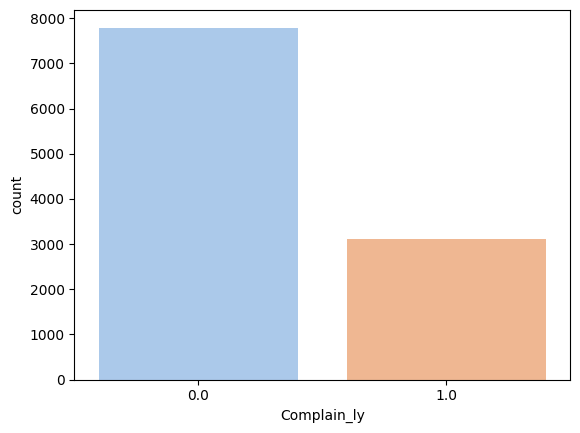

In [377]:
sns.countplot(x='Complain_ly', data=df, palette='pastel')

<Axes: xlabel='Login_device', ylabel='count'>

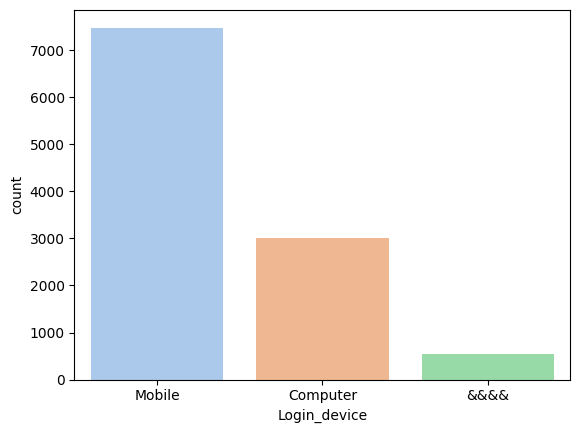

In [378]:
sns.countplot(x='Login_device', data=df, palette='pastel')

<Axes: xlabel='City_Tier'>

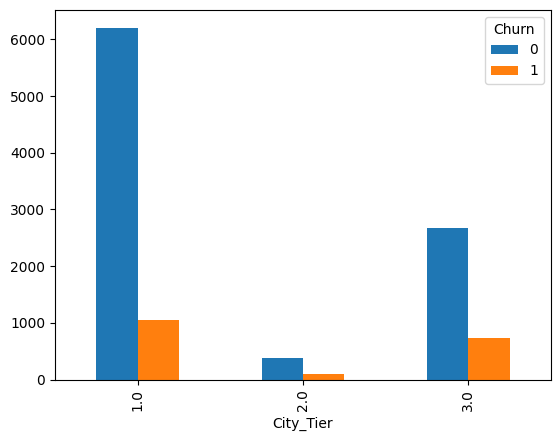

In [379]:
pd.crosstab(index=df['City_Tier'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='Payment'>

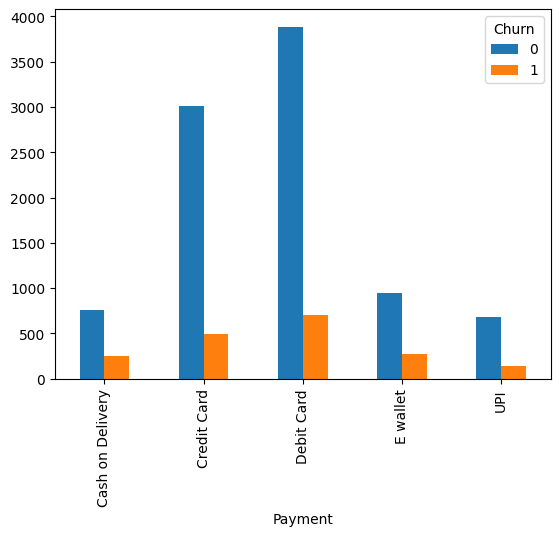

In [380]:
pd.crosstab(index=df['Payment'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='Gender'>

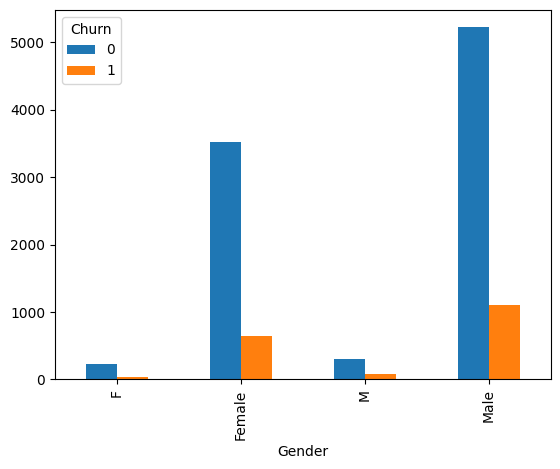

In [381]:
pd.crosstab(index=df['Gender'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='Service_Score'>

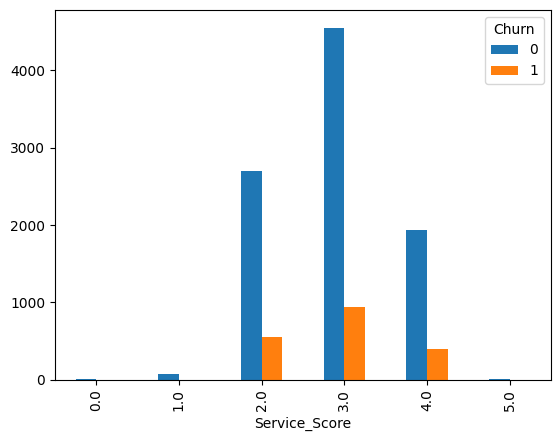

In [382]:
pd.crosstab(index=df['Service_Score'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='Account_user_count'>

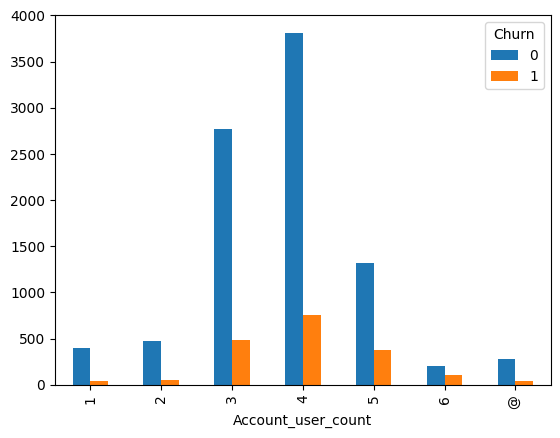

In [383]:
pd.crosstab(index=df['Account_user_count'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='account_segment'>

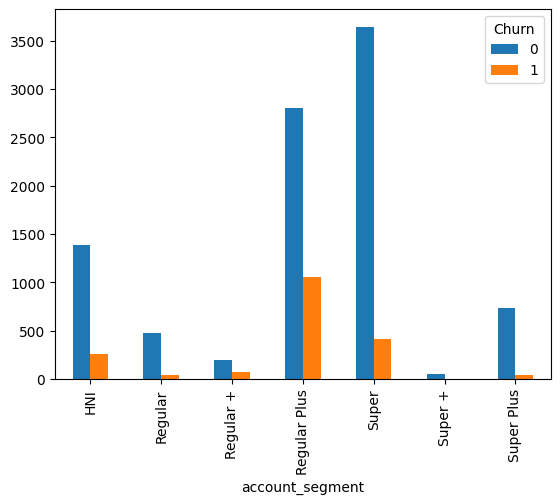

In [384]:
pd.crosstab(index=df['account_segment'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='CC_Agent_Score'>

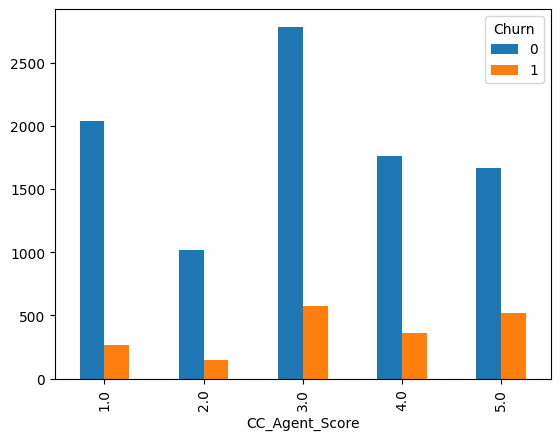

In [385]:
pd.crosstab(index=df['CC_Agent_Score'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='Marital_Status'>

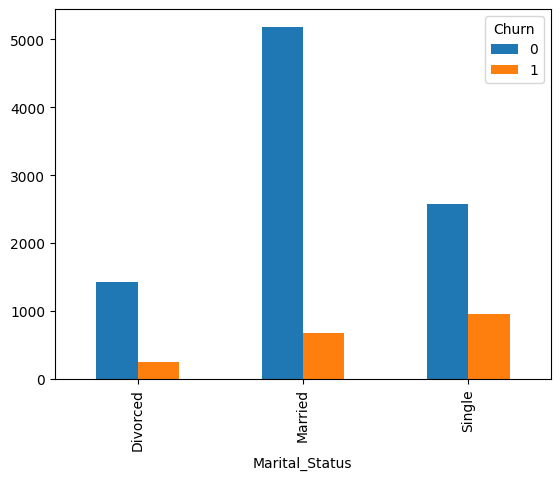

In [386]:
pd.crosstab(index=df['Marital_Status'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='Complain_ly'>

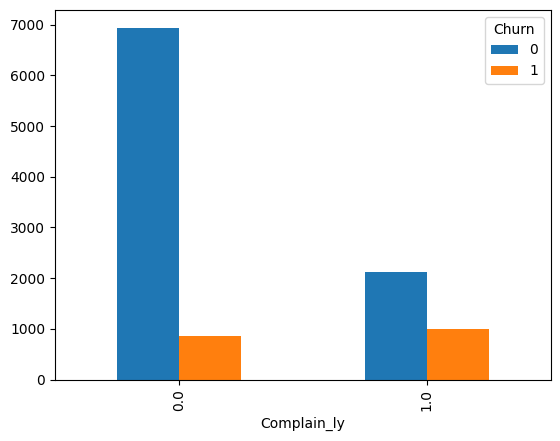

In [387]:
pd.crosstab(index=df['Complain_ly'], columns=df['Churn']).plot(kind='bar')

<Axes: xlabel='Login_device'>

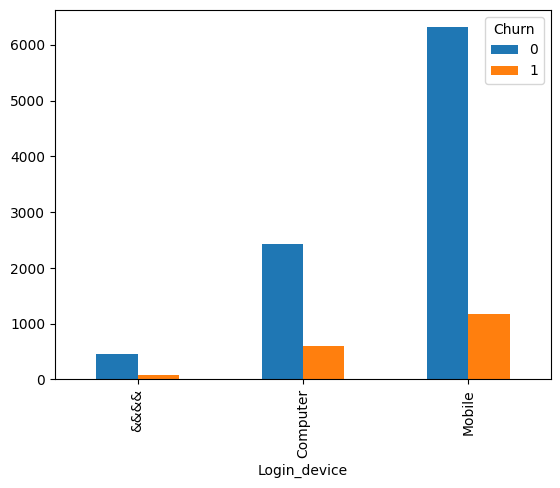

In [388]:
pd.crosstab(index=df['Login_device'], columns=df['Churn']).plot(kind='bar')

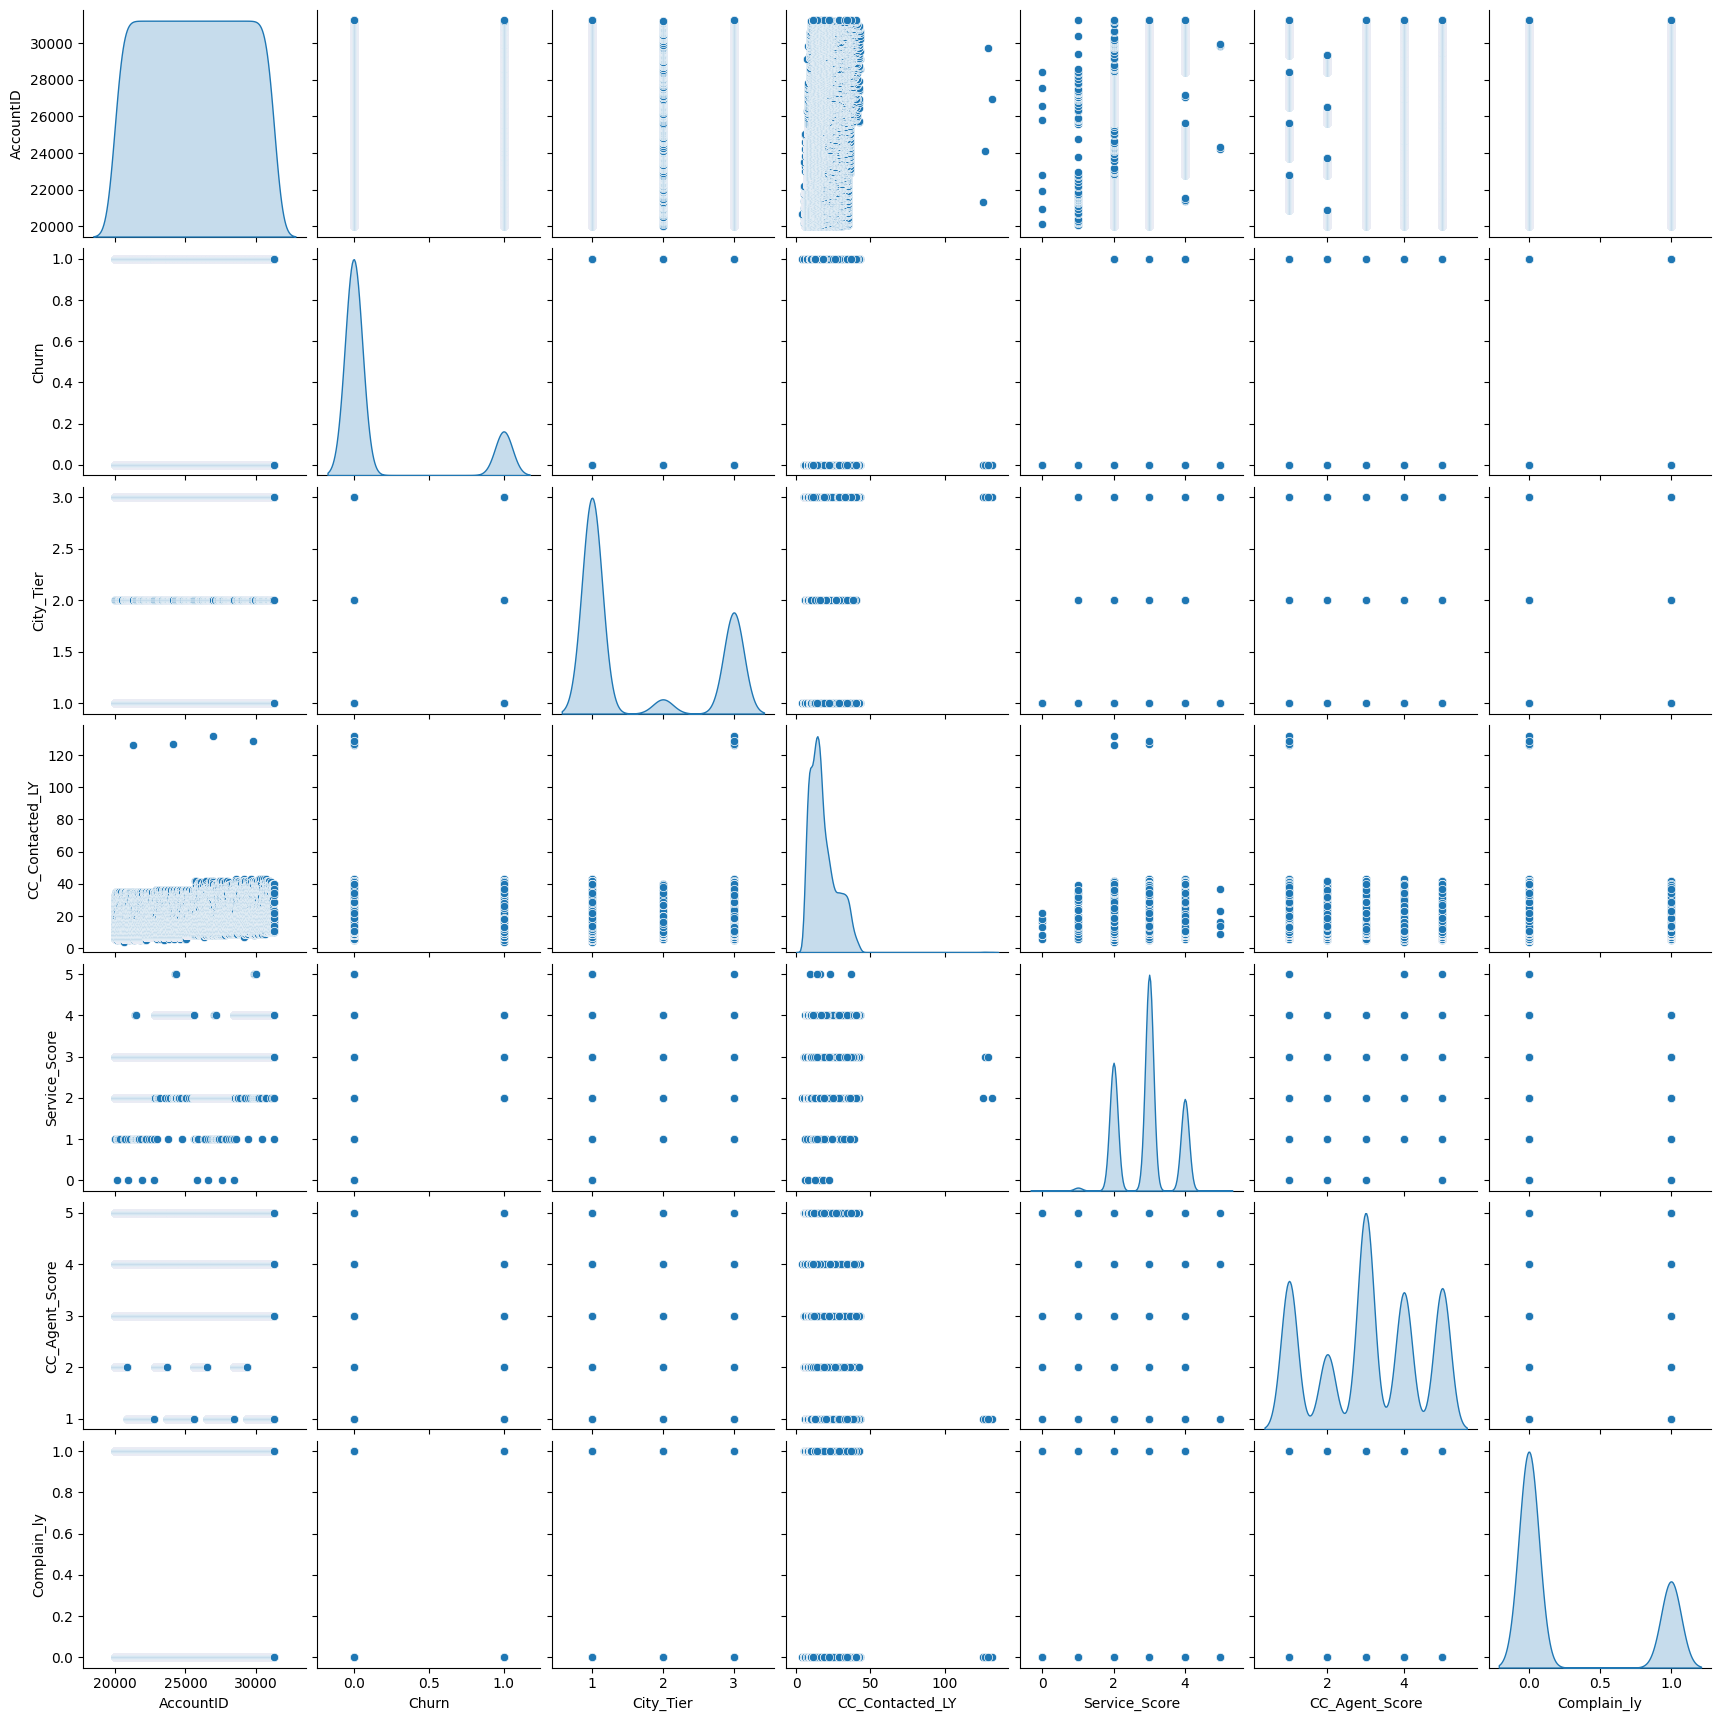

In [389]:
sns.pairplot(df, diag_kind="kde")

In [390]:
df.corr()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
AccountID,1.000000,-0.009541,0.001983,0.252562,0.301782,-0.017715,-0.005168
Churn,-0.009541,1.000000,0.084135,0.072071,0.008991,0.105796,0.251488
City_Tier,0.001983,0.084135,1.000000,0.011835,-0.006443,-0.011479,0.002478
CC_Contacted_LY,0.252562,0.072071,0.011835,1.000000,0.060052,-0.000209,0.027244
Service_Score,0.301782,0.008991,-0.006443,0.060052,1.000000,0.032135,0.002643
CC_Agent_Score,-0.017715,0.105796,-0.011479,-0.000209,0.032135,1.000000,-0.031459
Complain_ly,-0.005168,0.251488,0.002478,0.027244,0.002643,-0.031459,1.000000


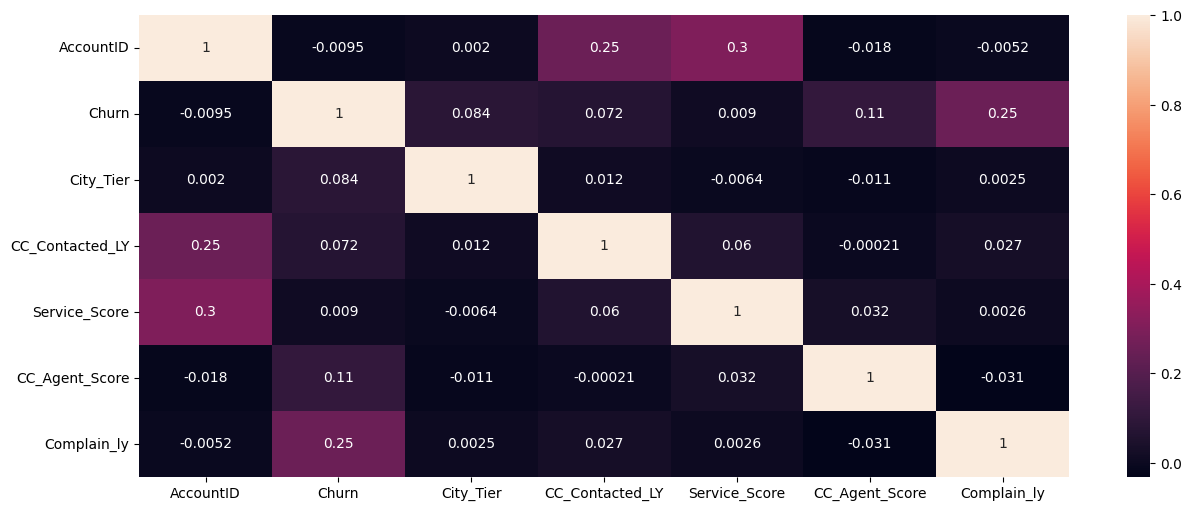

In [391]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [392]:
df = df.drop('AccountID', axis=1)

In [393]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [394]:
for feature in df.columns:
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Churn
0    9364
1    1896
Name: Churn, dtype: int64


Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64


City_Tier
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64


CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0    

##Treating bad data

In [395]:
df["Tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [396]:
df['Tenure'] = df['Tenure'].replace('#',np.NaN)

In [397]:
df['Tenure'] = df['Tenure'].astype('Int64')
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [398]:
df["Tenure"].unique()

<IntegerArray>
[ 4,  0,  2, 13, 11,  9, 99, 19, 20, 14,  8, 26, 18,  5, 30,  7,  1, 23,  3,
 29,  6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 37, dtype: Int64

In [399]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [400]:
df["City_Tier"].unique()

array([ 3.,  1., nan,  2.])

In [401]:
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mode()[0])
df['City_Tier'] = df['City_Tier'].astype('Int64')

In [402]:
df["City_Tier"].unique()

<IntegerArray>
[3, 1, 2]
Length: 3, dtype: Int64

In [403]:
df["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [404]:
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].astype('Int64')

In [405]:
df["CC_Contacted_LY"].unique()

<IntegerArray>
[  6,   8,  30,  15,  12,  22,  11,   9,  31,  18,  13,  20,  29,  28,  26,
  14,  10,  25,  27,  17,  23,  33,  19,  35,  24,  16,  32,  21,  34,   5,
   4, 126,   7,  36, 127,  42,  38,  37,  39,  40,  41, 132,  43, 129]
Length: 44, dtype: Int64

In [406]:
df["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [407]:
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])

In [408]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [409]:
df["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [410]:
df['Gender'] = df['Gender'].replace('F','Female')
df['Gender'] = df['Gender'].replace('M','Male')

In [411]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [412]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [413]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [414]:
df["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [415]:
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mode()[0])

In [416]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [417]:
df["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [418]:
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)
df['Account_user_count'] = df['Account_user_count'].fillna(df['Account_user_count'].median())

In [419]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [420]:
df["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [421]:
df['account_segment'] = df['account_segment'].replace('Regular +','Regular Plus')
df['account_segment'] = df['account_segment'].replace('Super +','Super Plus')

In [422]:
df["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [423]:
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [424]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [425]:
df["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [426]:
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])

In [427]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [428]:
df['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [429]:
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [430]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [431]:
df['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [432]:
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)

In [433]:
df['rev_per_month'] = df['rev_per_month'].fillna(df['rev_per_month'].median())

In [434]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [435]:
df["Complain_ly"].unique()

array([ 1.,  0., nan])

In [436]:
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])

In [437]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [438]:
df["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [439]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)

In [440]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [441]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [442]:
df["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [443]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)

In [444]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())

In [445]:
df['coupon_used_for_payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [446]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [447]:
df["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [448]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)

In [449]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())

In [450]:
df["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [451]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [452]:
df["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [453]:
df['cashback'] = df['cashback'].replace('$',np.NaN)
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [454]:
df["cashback"].unique()

array([159.93, 120.9 , 165.25, ..., 227.36, 226.91, 191.42])

In [455]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               221
dtype: int64

In [456]:
df["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [457]:
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)
df['Login_device'] = df['Login_device'].fillna(df['Login_device'].mode()[0])

In [458]:
df["Login_device"].unique()

array(['Mobile', 'Computer'], dtype=object)

In [459]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  Int64  
 2   City_Tier                11260 non-null  Int64  
 3   CC_Contacted_LY          11260 non-null  Int64  
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [461]:
df['Payment'] = df['Payment'].replace('Debit Card','1')
df['Payment'] = df['Payment'].replace('UPI','2')
df['Payment'] = df['Payment'].replace('Credit Card','3')
df['Payment'] = df['Payment'].replace('Cash on Delivery','4')
df['Payment'] = df['Payment'].replace('E wallet','5')

In [462]:
df['Gender'] = df['Gender'].replace('Female','1')
df['Gender'] = df['Gender'].replace('Male','2')

In [463]:
df['account_segment'] = df['account_segment'].replace('Regular','1')
df['account_segment'] = df['account_segment'].replace('Regular Plus','2')
df['account_segment'] = df['account_segment'].replace('HNI','3')
df['account_segment'] = df['account_segment'].replace('Super','4')
df['account_segment'] = df['account_segment'].replace('Super Plus','5')

In [464]:
df['Marital_Status'] = df['Marital_Status'].replace('Single','1')
df['Marital_Status'] = df['Marital_Status'].replace('Divorced','2')
df['Marital_Status'] = df['Marital_Status'].replace('Married','3')

In [465]:
df['Login_device'] = df['Login_device'].replace('Mobile','1')
df['Login_device'] = df['Login_device'].replace('Computer','2')

In [466]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3,6,1,1,3.0,3.0,4,2.0,1,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,0,1,8,2,2,3.0,4.0,2,3.0,1,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,0,1,30,1,2,2.0,4.0,2,3.0,1,6.0,1.0,14.0,0.0,3.0,165.25,1
3,1,0,3,15,1,2,2.0,4.0,4,5.0,1,8.0,0.0,23.0,0.0,3.0,134.07,1
4,1,0,1,12,3,2,2.0,3.0,2,5.0,1,3.0,0.0,11.0,1.0,3.0,129.60,1


In [467]:
df.dtypes

Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [468]:
df['Payment'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [469]:
df['Gender'].unique()

array(['1', '2'], dtype=object)

In [470]:
df['account_segment'].unique()

array(['4', '2', '1', '3', '5'], dtype=object)

In [471]:
df['Marital_Status'].unique()

array(['1', '2', '3'], dtype=object)

In [472]:
df['Login_device'].unique()

array(['1', '2'], dtype=object)

In [473]:
df['Payment'] = df['Payment'].astype('int64')
df['Gender'] = df['Gender'].astype('int64')
df['Service_Score'] = df['Service_Score'].astype('int64')
df['Account_user_count'] = df['Account_user_count'].astype('int64')
df['account_segment'] = df['account_segment'].astype('int64')
df['CC_Agent_Score'] = df['CC_Agent_Score'].astype('int64')
df['rev_per_month'] = df['rev_per_month'].astype('int64')
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('int64')
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype('int64')
df['cashback'] = df['cashback'].astype('int64')
df['Marital_Status'] = df['Marital_Status'].astype('int64')
df['Complain_ly'] = df['Complain_ly'].astype('int64')
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('int64')
df['Login_device'] = df['Login_device'].astype('int64')

In [474]:
df.dtypes

Churn                      int64
Tenure                     Int64
City_Tier                  Int64
CC_Contacted_LY            Int64
Payment                    int64
Gender                     int64
Service_Score              int64
Account_user_count         int64
account_segment            int64
CC_Agent_Score             int64
Marital_Status             int64
rev_per_month              int64
Complain_ly                int64
rev_growth_yoy             int64
coupon_used_for_payment    int64
Day_Since_CC_connect       int64
cashback                   int64
Login_device               int64
dtype: object

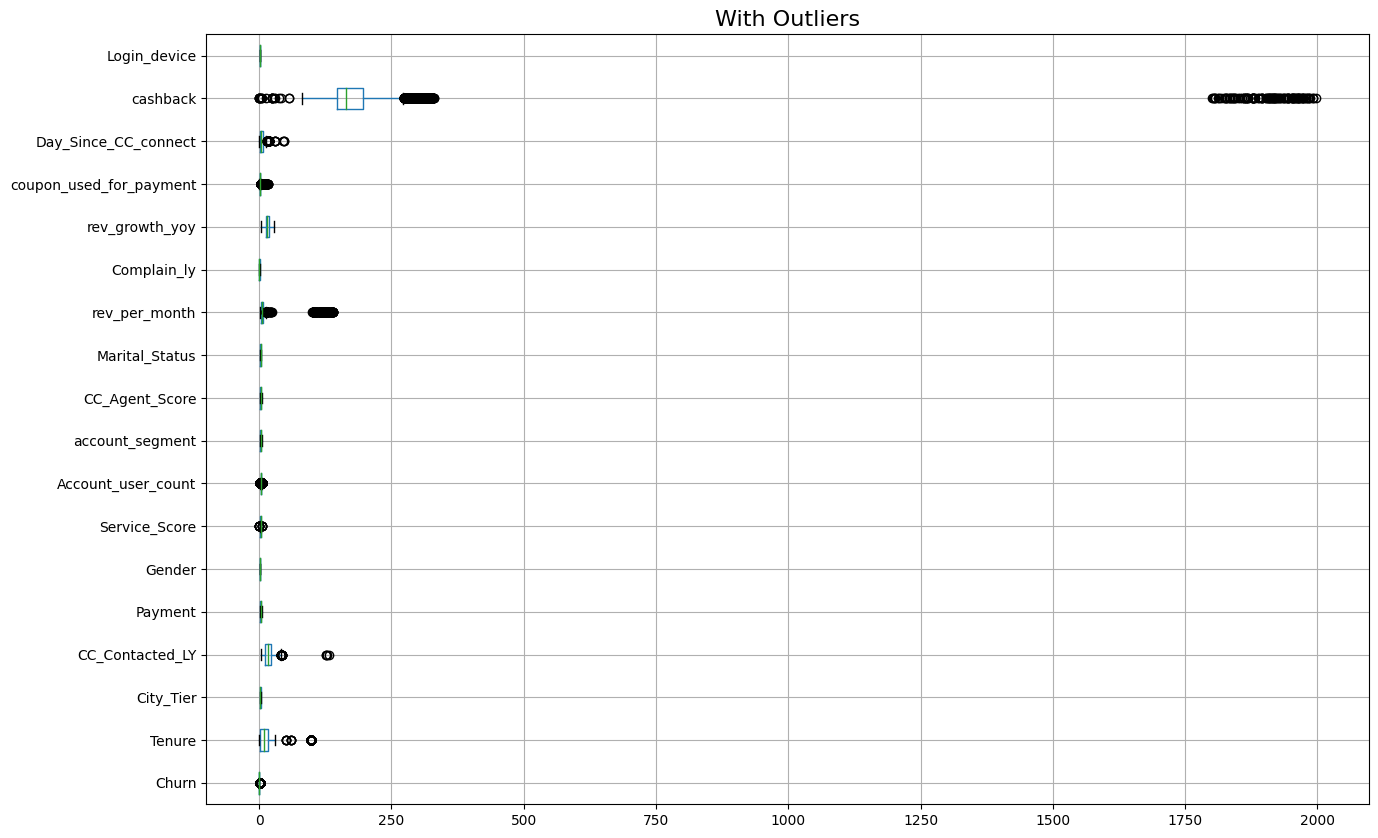

In [475]:
cont = ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
        'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score',
        'Marital_Status', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
        'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']

plt.figure(figsize=(15, 10))
df[cont].boxplot(vert=0)
plt.title('With Outliers', fontsize=16)
plt.show()

In [476]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [477]:
columns_to_process = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'cashback',
                       'rev_per_month', 'Day_Since_CC_connect', 'coupon_used_for_payment',
                       'rev_growth_yoy']

for column in columns_to_process:
    lr, ur = remove_outlier(df[column])
    print(f'Lower Range for {column}: {lr}\nUpper Range for {column}: {ur}')


    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

Lower Range for Tenure: -19.0
Upper Range for Tenure: 37.0
Lower Range for CC_Contacted_LY: -7.0
Upper Range for CC_Contacted_LY: 41.0
Lower Range for Service_Score: 0.5
Upper Range for Service_Score: 4.5
Lower Range for Account_user_count: 1.5
Upper Range for Account_user_count: 5.5
Lower Range for cashback: 72.0
Upper Range for cashback: 272.0
Lower Range for rev_per_month: -3.0
Upper Range for rev_per_month: 13.0
Lower Range for Day_Since_CC_connect: -5.5
Upper Range for Day_Since_CC_connect: 14.5
Lower Range for coupon_used_for_payment: -0.5
Upper Range for coupon_used_for_payment: 3.5
Lower Range for rev_growth_yoy: 4.0
Upper Range for rev_growth_yoy: 28.0


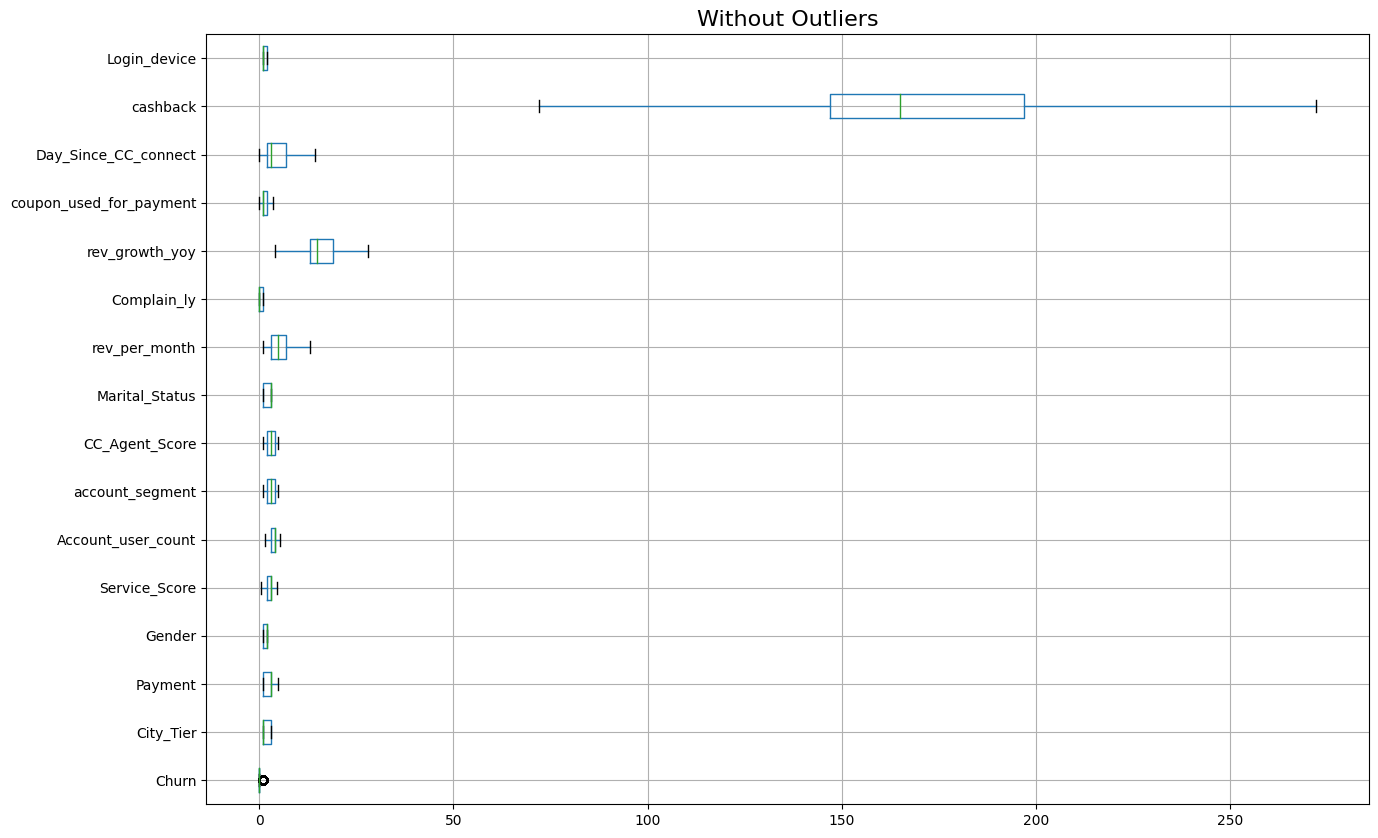

In [478]:
cont = ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
        'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score',
        'Marital_Status', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
        'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']

plt.figure(figsize=(15, 10))
df[cont].boxplot(vert=0)
plt.title('Without Outliers', fontsize=16)
plt.show()

In [479]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
                    'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score',
                    'Marital_Status', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
                    'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']

scaler = MinMaxScaler()

df_scaled = pd.DataFrame()
for column in columns_to_scale:
    df_scaled[f'{column}'] = scaler.fit_transform(df[[column]]).flatten()

df_scaled.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.0,0.108108,1.0,0.054054,0.00,0.0,0.625,0.375,0.75,0.25,0.0,0.666667,1.0,0.291667,0.285714,0.344828,0.435,0.0
1,1.0,0.000000,0.0,0.108108,0.25,1.0,0.625,0.625,0.25,0.50,0.0,0.500000,1.0,0.458333,0.000000,0.000000,0.240,0.0
2,1.0,0.000000,0.0,0.702703,0.00,1.0,0.375,0.625,0.25,0.50,0.0,0.416667,1.0,0.416667,0.000000,0.206897,0.465,0.0
3,1.0,0.000000,1.0,0.297297,0.00,1.0,0.375,0.625,0.75,1.00,0.0,0.583333,0.0,0.791667,0.000000,0.206897,0.310,0.0
4,1.0,0.000000,0.0,0.216216,0.50,1.0,0.375,0.375,0.25,1.00,0.0,0.166667,0.0,0.291667,0.285714,0.206897,0.285,0.0


In [480]:
df['Churn'] = df['Churn'].astype(int)

In [481]:
df_scaled.dtypes

Churn                      float64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device               float64
dtype: object

In [482]:
df_new = df_scaled.astype(int)

In [483]:
df_new.dtypes

Churn                      int64
Tenure                     int64
City_Tier                  int64
CC_Contacted_LY            int64
Payment                    int64
Gender                     int64
Service_Score              int64
Account_user_count         int64
account_segment            int64
CC_Agent_Score             int64
Marital_Status             int64
rev_per_month              int64
Complain_ly                int64
rev_growth_yoy             int64
coupon_used_for_payment    int64
Day_Since_CC_connect       int64
cashback                   int64
Login_device               int64
dtype: object

In [484]:
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']

In [485]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [486]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [487]:
print('X_train_res',X_train_res.shape)
print('y_train_res',y_train_res.shape)

X_train_res (13150, 17)
y_train_res (13150,)


In [488]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [489]:
from collections import Counter
counter=Counter(y)
counter

Counter({1: 9364, 0: 9364})

In [490]:
from sklearn.cluster import KMeans

In [491]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_new)
    wss.append(KM.inertia_)

In [492]:
wss

[20240.6528419186,
 17531.40482609503,
 15585.850829534089,
 14662.950643379889,
 13723.54799184468,
 12851.37311004234,
 12422.362771070573,
 11821.456620130557,
 11379.506724523475,
 11078.140630842881]

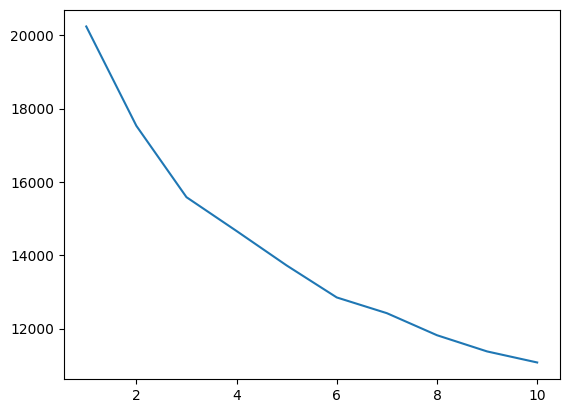

In [493]:
plt.plot(range(1,11), wss);

In [494]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_new)
labels = k_means.labels_

In [495]:
df_new["Clus_kmeans"] = labels
df_new.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Clus_kmeans
0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [496]:
df_new.groupby(["Clus_kmeans"]).count()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
Clus_kmeans,,,,,,,,,,,,,,,,,,
0,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838,4838
1,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405
2,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017


# Notes ll

In [497]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [498]:
lg = LogisticRegression(random_state=42)
lg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [499]:
y_train_predict_lg = lg.predict(X_train)
y_test_predict_lg = lg.predict(X_test)

In [500]:
print("Accuracy of training dataset:",lg.score(X_train, y_train))

Accuracy of training dataset: 0.8411570667343314


In [501]:
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.8336293664890467


In [502]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
print("Confusion Matrix for train dataset")
confusion_matrix(y_train, y_train_predict_lg)

Confusion Matrix for train dataset


array([[6477,   98],
       [1154,  153]])

In [503]:
print("Confusion Matrix for test dataset")
confusion_matrix(y_test, y_test_predict_lg)

Confusion Matrix for test dataset


array([[2745,   44],
       [ 518,   71]])

In [504]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [505]:
print("Classification report for train dataset")
print(classification_report(y_train, y_train_predict_lg))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      6575
           1       0.61      0.12      0.20      1307

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.55      7882
weighted avg       0.81      0.84      0.79      7882



In [506]:
print("Classification report for test dataset")
print(classification_report(y_test, y_test_predict_lg))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2789
           1       0.62      0.12      0.20       589

    accuracy                           0.83      3378
   macro avg       0.73      0.55      0.55      3378
weighted avg       0.80      0.83      0.78      3378



AUC score and ROC curve for training dataset
AUC: 0.750


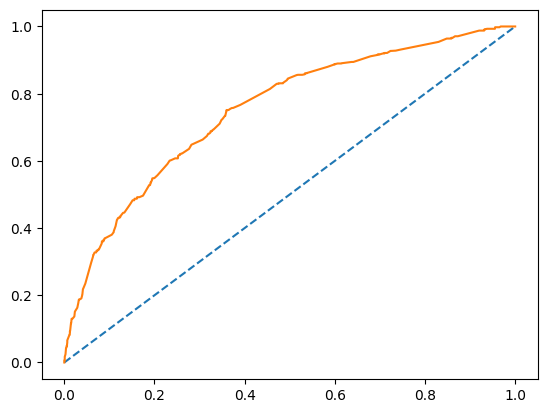

In [507]:
probs = lg.predict_proba(X_train)
probs = probs[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.750


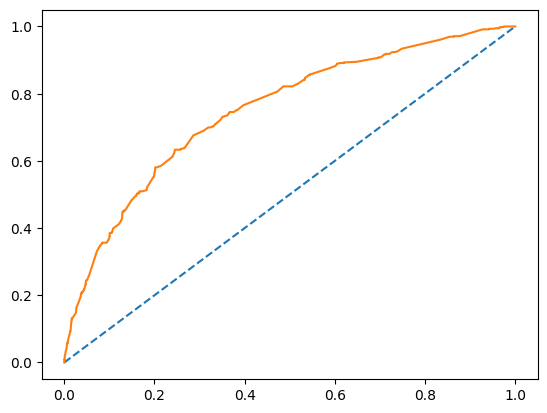

In [508]:
probs = lg.predict_proba(X_test)
probs = probs[:, 1]
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [509]:
from sklearn.model_selection import cross_val_score
print("cross validation scroes for traning dataset")
scores_lg_train = cross_val_score(lg, X_train, y_train, cv=10)
scores_lg_train

cross validation scroes for traning dataset


array([0.84030418, 0.83269962, 0.84263959, 0.83375635, 0.8464467 ,
       0.84263959, 0.82614213, 0.84898477, 0.84010152, 0.83883249])

In [510]:
print("cross calidation scores for testing dataset")
scores_lg_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lg_test

cross calidation scores for testing dataset


array([0.84023669, 0.81656805, 0.81656805, 0.86686391, 0.84023669,
       0.83136095, 0.84023669, 0.82544379, 0.83679525, 0.82492582])

#Parameter Hypertuning

In [511]:
from sklearn.model_selection import GridSearchCV

In [512]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 9),
    'solver': ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
}


grid_search = GridSearchCV(lg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_train_predict_lgcv = best_model.predict(X_train)
y_test_predict_lgcv = best_model.predict(X_test)


accuracy_train = best_model.score(X_train, y_train)
accuracy_test = best_model.score(X_test, y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Best Hyperparameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy: 0.8411570667343314
Test Accuracy: 0.8336293664890467


In [513]:
print("Classification report for train dataset")
print(classification_report(y_train, y_train_predict_lgcv))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      6575
           1       0.61      0.12      0.20      1307

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.55      7882
weighted avg       0.81      0.84      0.79      7882



In [514]:
print("Classification report for test dataset")
print(classification_report(y_test, y_test_predict_lgcv))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2789
           1       0.62      0.12      0.20       589

    accuracy                           0.83      3378
   macro avg       0.73      0.55      0.55      3378
weighted avg       0.80      0.83      0.78      3378



In [515]:
print("confusion matrix for train dataset")
confusion_matrix(y_train, y_train_predict_lgcv)

confusion matrix for train dataset


array([[6477,   98],
       [1154,  153]])

In [516]:
print("confusion matrix for test dataset")
confusion_matrix(y_test, y_test_predict_lgcv)

confusion matrix for test dataset


array([[2745,   44],
       [ 518,   71]])

AUC score and ROC curve for training dataset
AUC: 0.750


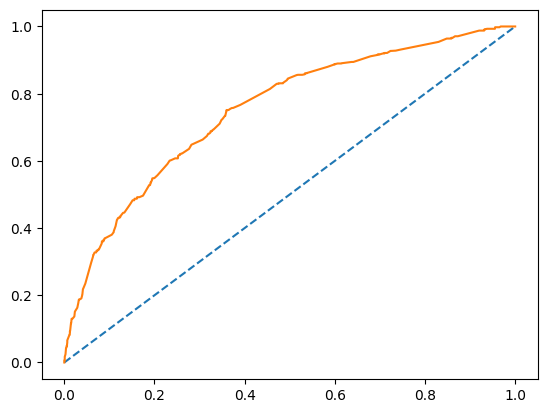

In [517]:
probs = best_model.predict_proba(X_train)
probs = probs[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.749


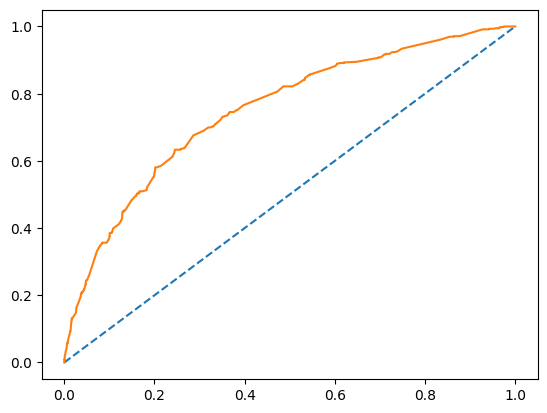

In [518]:
probs = best_model.predict_proba(X_test)
probs = probs[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [519]:
print("cross validation score for training dataset")
scores_lgcv_train = cross_val_score(best_model, X_train, y_train, cv=10)
scores_lgcv_train

cross validation score for training dataset


array([0.84030418, 0.83269962, 0.84263959, 0.83375635, 0.8464467 ,
       0.84263959, 0.82614213, 0.84898477, 0.84010152, 0.83883249])

In [520]:
print("cross calidation score for testing dataset")
scores_lgcv_test = cross_val_score(best_model, X_test, y_test, cv=10)
scores_lgcv_test

cross calidation score for testing dataset


array([0.84023669, 0.81656805, 0.81656805, 0.86686391, 0.84023669,
       0.83136095, 0.84023669, 0.82544379, 0.83679525, 0.82492582])

#SMOTE

In [521]:
lg.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [522]:
y_train_predict_lgsm = lg.predict(X_train_res)
y_test_predict_lgsm = lg.predict(X_test)

In [523]:
print("Accuracy of training dataset:",lg.score(X_train_res, y_train_res))
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of training dataset: 0.6768821292775665
Accuracy of testing dataset: 0.6764357608052102


In [524]:
print("Classification report for train dataset")
print(classification_report(y_train_res, y_train_predict_lgsm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      6575
           1       0.68      0.68      0.68      6575

    accuracy                           0.68     13150
   macro avg       0.68      0.68      0.68     13150
weighted avg       0.68      0.68      0.68     13150



In [525]:
print("Classification report for test dataset")
print(classification_report(y_test, y_test_predict_lgsm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      2789
           1       0.31      0.69      0.43       589

    accuracy                           0.68      3378
   macro avg       0.61      0.68      0.60      3378
weighted avg       0.81      0.68      0.71      3378



In [526]:
print("Confusion matrix for train dataset")
confusion_matrix(y_train_res, y_train_predict_lgsm)

Confusion matrix for train dataset


array([[4449, 2126],
       [2123, 4452]])

In [527]:
print("Confusion matrix for test dataset")
confusion_matrix(y_test, y_test_predict_lgsm)

Confusion matrix for test dataset


array([[1878,  911],
       [ 182,  407]])

AUC score and ROC curve for training dataset
AUC: 0.755


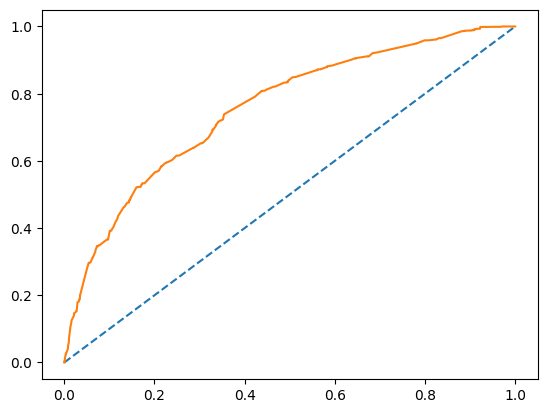

In [528]:
probs = lg.predict_proba(X_train_res)
probs = probs[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.742


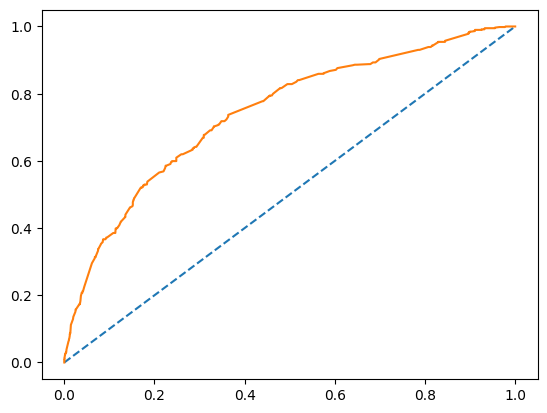

In [529]:
probs = lg.predict_proba(X_test)
probs = probs[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [530]:
print("cross validation score for balanced training dataset")
scores_lgsm_train = cross_val_score(lg, X_train_res, y_train_res, cv=10)
scores_lgsm_train

cross validation score for balanced training dataset


array([0.67072243, 0.68973384, 0.66996198, 0.67148289, 0.67452471,
       0.65703422, 0.68669202, 0.67072243, 0.66692015, 0.70722433])

In [531]:
print("cross validation score for testing dataset")
scores_lgsm_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lgsm_test

cross validation score for testing dataset


array([0.84023669, 0.81656805, 0.81656805, 0.86686391, 0.84023669,
       0.83136095, 0.84023669, 0.82544379, 0.83679525, 0.82492582])

#LDA

In [532]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [533]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [534]:
y_train_predict_lda = lda.predict(X_train)
y_test_predict_lda = lda.predict(X_test)

In [535]:
print("Accuracy score of training dataset:",lda.score(X_train, y_train))
print("Accuracy score of testing dataset:",lda.score(X_test, y_test))

Accuracy score of training dataset: 0.8417914234965744
Accuracy score of testing dataset: 0.8348134991119005


In [536]:
print("Confusion matrix of training dataset")
confusion_matrix(y_train, y_train_predict_lda)

Confusion matrix of training dataset


array([[6432,  143],
       [1104,  203]])

In [537]:
print("Confusion matrix of testing dataset")
confusion_matrix(y_test, y_test_predict_lda)

Confusion matrix of testing dataset


array([[2720,   69],
       [ 489,  100]])

In [538]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      6575
           1       0.59      0.16      0.25      1307

    accuracy                           0.84      7882
   macro avg       0.72      0.57      0.58      7882
weighted avg       0.81      0.84      0.80      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2789
           1       0.59      0.17      0.26       589

    accuracy                           0.83      3378
   macro avg       0.72      0.57      0.59      3378
weighted avg       0.80      0.83      0.79      3378
 



AUC score and ROC curve for training dataset
AUC: 0.742


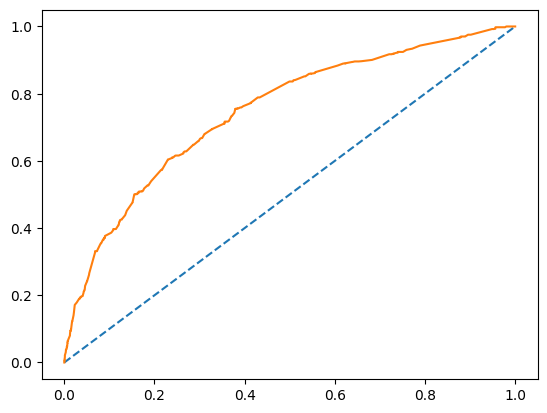

In [539]:
probslda_train = lda.predict_proba(X_train)
probslda_train = probslda_train[:, 1]
print("AUC score and ROC curve for training dataset")
train_auc1 = roc_auc_score(y_train, probslda_train)
print('AUC: %.3f' % auc)
train_fpr1, train_tpr1, train_thresholds1 = roc_curve(y_train, probslda_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr1, train_tpr1);

AUC score and ROC curve for testing dataset
AUC: 0.742


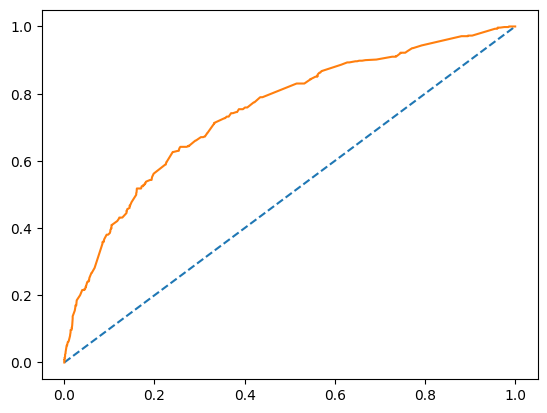

In [540]:
probslda_test = lda.predict_proba(X_test)
probslda_test = probslda_test[:, 1]
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probslda_test)
print('AUC: %.3f' % auc)
test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test, probslda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr2, test_tpr2);

In [541]:
print("cross validation score for training dataset")
scores_lda_train = cross_val_score(lda, X_train, y_train, cv=10)
scores_lda_train

cross validation score for training dataset


array([0.83903676, 0.83903676, 0.84137056, 0.83121827, 0.84517766,
       0.84517766, 0.8286802 , 0.85913706, 0.84010152, 0.82994924])

In [542]:
print("cross validation score for testing dataset")
scores_lda_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_lda_test

cross validation score for testing dataset


array([0.84319527, 0.81952663, 0.82840237, 0.85207101, 0.83431953,
       0.84023669, 0.84023669, 0.81656805, 0.83382789, 0.82789318])

LDA Parameter Hypertuning

In [543]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', 'float', 'None'],
}

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [544]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='f1')

In [545]:
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr'}

In [546]:
best_grid = grid_search.best_estimator_

In [547]:
y_train_predict_ldacv = best_grid.predict(X_train)
y_test_predict_ldacv = best_grid.predict(X_test)

In [548]:
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of training dataset after gridsearchCV: 0.8416645521441258
Accuracy of testing dataset after gridsearchCV: 0.8339253996447602


In [549]:
print("confusuon matrix for training dataset")
confusion_matrix(y_train, y_train_predict_ldacv)

confusuon matrix for training dataset


array([[6431,  144],
       [1104,  203]])

In [550]:
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, y_test_predict_ldacv)

confusuon matrix for testing dataset


array([[2717,   72],
       [ 489,  100]])

In [551]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict_ldacv),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict_ldacv),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      6575
           1       0.59      0.16      0.25      1307

    accuracy                           0.84      7882
   macro avg       0.72      0.57      0.58      7882
weighted avg       0.81      0.84      0.80      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.85      0.97      0.91      2789
           1       0.58      0.17      0.26       589

    accuracy                           0.83      3378
   macro avg       0.71      0.57      0.58      3378
weighted avg       0.80      0.83      0.79      3378
 



AUC score and ROC curve for training dataset
AUC: 0.747


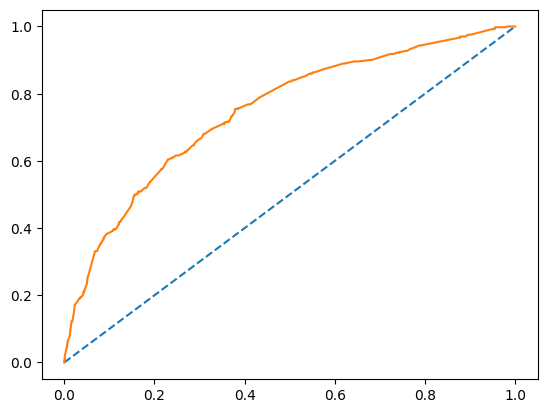

In [552]:
probs_ldacvtrain = best_grid.predict_proba(X_train)
probs_ldacvtrain = probs_ldacvtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_ldacvtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_ldacvtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.746


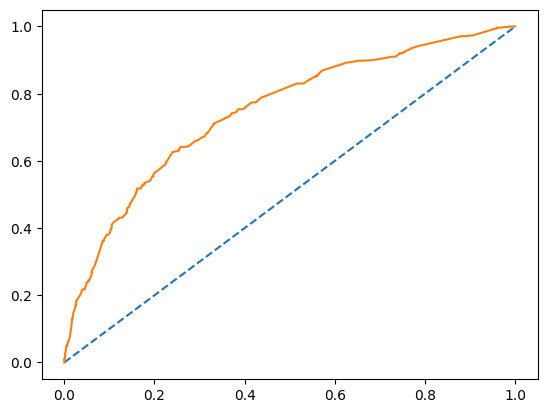

In [553]:
probs_ldatest = best_grid.predict_proba(X_test)
probs_ldatest = probs_ldatest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_ldatest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_ldatest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [554]:
print("cross validation scores for training dataset")
scores_ldacv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_ldacv_train

cross validation scores for training dataset


array([0.83776933, 0.83903676, 0.84137056, 0.83502538, 0.84390863,
       0.8464467 , 0.82741117, 0.85659898, 0.84263959, 0.83121827])

In [555]:
print("cross validation scores from testing dataset")
scores_ldacv_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldacv_test

cross validation scores from testing dataset


array([0.84319527, 0.81952663, 0.82840237, 0.85207101, 0.83431953,
       0.84023669, 0.84023669, 0.81656805, 0.83382789, 0.82789318])

LDA SMOTE

In [556]:
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [557]:
y_train_predict_ldasm = lda.predict(X_train_res)
y_test_predict_ldasm = lda.predict(X_test)

In [558]:
print("Accuracy of training dataset:",lda.score(X_train_res, y_train_res))
print("Accuracy of testing dataset:",lda.score(X_test, y_test))

Accuracy of training dataset: 0.6798479087452471
Accuracy of testing dataset: 0.6788040260509177


In [559]:
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, y_train_predict_ldasm)

confusion matrix for training dataset


array([[4460, 2115],
       [2095, 4480]])

In [560]:
print("confusion matrix for testing dataset")
confusion_matrix(y_test, y_test_predict_ldasm)

confusion matrix for testing dataset


array([[1882,  907],
       [ 178,  411]])

In [561]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res, y_train_predict_ldasm),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_ldasm),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.68      0.68      0.68      6575
           1       0.68      0.68      0.68      6575

    accuracy                           0.68     13150
   macro avg       0.68      0.68      0.68     13150
weighted avg       0.68      0.68      0.68     13150
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.67      0.78      2789
           1       0.31      0.70      0.43       589

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.81      0.68      0.72      3378
 



AUC score and ROC curve for training dataset
AUC: 0.754


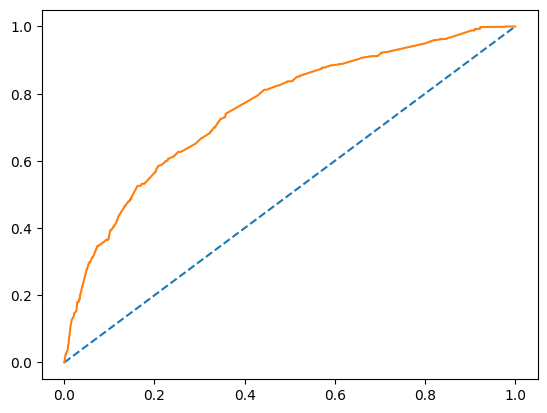

In [562]:
probs_ldasmtrain = lda.predict_proba(X_train_res)
probs_ldasmtrain = probs_ldasmtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs_ldasmtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs_ldasmtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.744


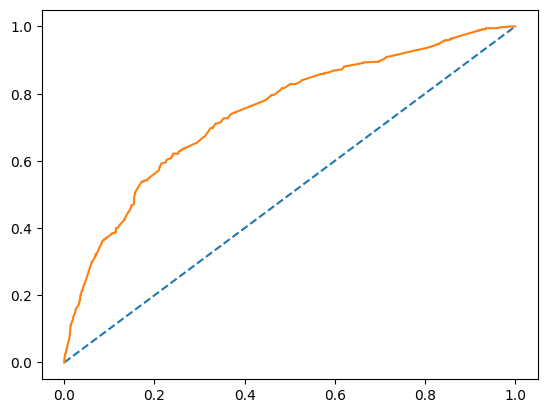

In [563]:
probs_ldasmtest = lda.predict_proba(X_test)
probs_ldasmtest = probs_ldasmtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_ldasmtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_ldasmtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [564]:
print("cross validation scores for training dataset")
scores_ldasm_train = cross_val_score(lda, X_train_res, y_train_res, cv=10)
scores_ldasm_train

cross validation scores for training dataset


array([0.68060837, 0.69125475, 0.67376426, 0.67072243, 0.67376426,
       0.65779468, 0.69277567, 0.67072243, 0.66996198, 0.70798479])

In [565]:
print("cross validation scores for testing dataset")
scores_ldasm_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldasm_test

cross validation scores for testing dataset


array([0.84319527, 0.81952663, 0.82840237, 0.85207101, 0.83431953,
       0.84023669, 0.84023669, 0.81656805, 0.83382789, 0.82789318])

#KNN

In [566]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [567]:
y_train_predict_knn = knn.predict(X_train)
y_test_predict_knn = knn.predict(X_test)

print("Accracy of training dataset:", knn.score(X_train, y_train))
print("Accuracy for testing dataset", knn.score(X_test, y_test))

Accracy of training dataset: 0.8514336462826694
Accuracy for testing dataset 0.8342214328004737


In [568]:
print("confusion matrix of training dataset")
print(metrics.confusion_matrix(y_train, y_train_predict_knn))

confusion matrix of training dataset
[[6278  297]
 [ 874  433]]


In [569]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_knn))

confusion matrix for testing dataset
[[2634  155]
 [ 405  184]]


In [570]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_knn),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_knn),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6575
           1       0.59      0.33      0.43      1307

    accuracy                           0.85      7882
   macro avg       0.74      0.64      0.67      7882
weighted avg       0.83      0.85      0.83      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2789
           1       0.54      0.31      0.40       589

    accuracy                           0.83      3378
   macro avg       0.70      0.63      0.65      3378
weighted avg       0.81      0.83      0.82      3378
 



AUC score and ROC curve for training dataset
AUC: 0.748


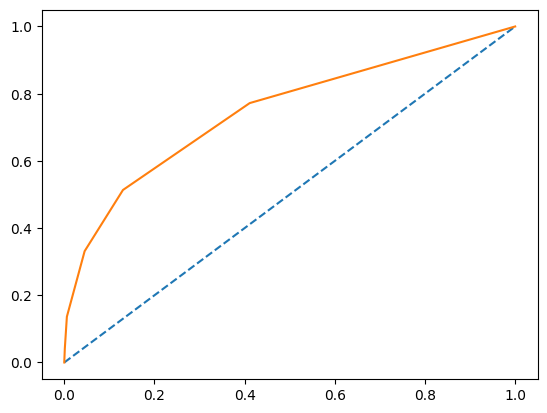

In [571]:
probs_knntrain = knn.predict_proba(X_train)
probs_knntrain = probs_knntrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_knntrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_knntrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.720


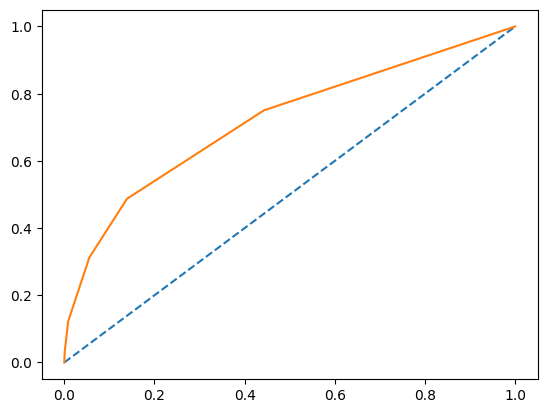

In [572]:
probs_knntest = knn.predict_proba(X_test)
probs_knntest = probs_knntest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_knntest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_knntest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [573]:
print("cross validation scores for train dataset")
scores_knn_train = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn_train

cross validation scores for train dataset


array([0.83396705, 0.84664132, 0.82106599, 0.83121827, 0.83502538,
       0.83248731, 0.82741117, 0.82233503, 0.84137056, 0.82614213])

In [574]:
print("cross validation scores for test dataset")
scores_knn_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knn_test

cross validation scores for test dataset


array([0.84023669, 0.80769231, 0.81952663, 0.81360947, 0.78994083,
       0.81952663, 0.80177515, 0.80177515, 0.80712166, 0.82492582])

In [575]:
ac_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

MCE = [1 - x for x in ac_scores]
MCE

[0.2066311426879811,
 0.18946121965660156,
 0.16577856719952633,
 0.16725873297809357,
 0.15926583777383063,
 0.15837773830669033,
 0.1604499703966844,
 0.16222616933096512,
 0.1613380698638247,
 0.16015393724097093]

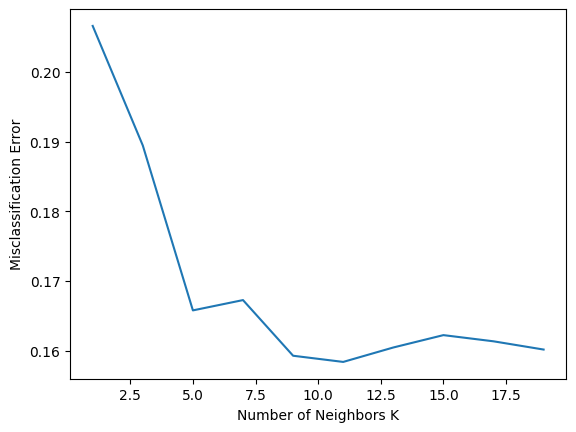

In [576]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [577]:
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [578]:
y_train_predict_knn5 = knn5.predict(X_train)
print("Accuracy for training dataset:",knn5.score(X_train, y_train))
y_test_predict_knn5 = knn5.predict(X_test)
print("Accuracy score for testing dataset:",knn5.score(X_test, y_test))

Accuracy for training dataset: 0.8514336462826694
Accuracy score for testing dataset: 0.8342214328004737


In [579]:
print("confusion matrix for training dataset")
print(confusion_matrix(y_train, y_train_predict_knn5))

confusion matrix for training dataset
[[6278  297]
 [ 874  433]]


In [580]:
print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, y_test_predict_knn5))

confusion matrix for testing dataset
[[2634  155]
 [ 405  184]]


In [581]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_knn5),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_knn5),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6575
           1       0.59      0.33      0.43      1307

    accuracy                           0.85      7882
   macro avg       0.74      0.64      0.67      7882
weighted avg       0.83      0.85      0.83      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2789
           1       0.54      0.31      0.40       589

    accuracy                           0.83      3378
   macro avg       0.70      0.63      0.65      3378
weighted avg       0.81      0.83      0.82      3378
 



AUC score and ROC curve for training dataset
AUC: 0.748


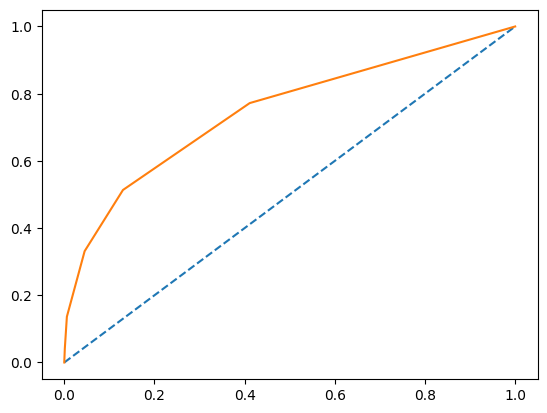

In [582]:
probs_knn5train = knn5.predict_proba(X_train)
probs_knn5train = probs_knn5train[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_knn5train)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_knn5train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.720


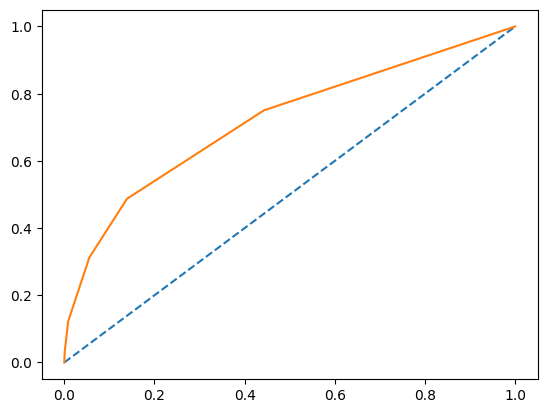

In [583]:
probs_knn5test = knn5.predict_proba(X_test)
probs_knn5test = probs_knn5test[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_knn5test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_knn5test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [584]:
print("cross validation scores for training dataset")
scores_knn5_train = cross_val_score(knn5, X_train, y_train, cv=10)
scores_knn5_train

cross validation scores for training dataset


array([0.83396705, 0.84664132, 0.82106599, 0.83121827, 0.83502538,
       0.83248731, 0.82741117, 0.82233503, 0.84137056, 0.82614213])

In [585]:
print("cross validation scores for testing dataset")
scores_knn5_test = cross_val_score(knn5, X_test, y_test, cv=10)
scores_knn5_test

cross validation scores for testing dataset


array([0.84023669, 0.80769231, 0.81952663, 0.81360947, 0.78994083,
       0.81952663, 0.80177515, 0.80177515, 0.80712166, 0.82492582])

KNN with Parameter Hypertuning

In [586]:
param_grid = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']

}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [587]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [588]:
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 9,
 'weights': 'distance'}

In [589]:
best_grid = grid_search.best_estimator_

In [590]:
y_train_predict_knncv = best_grid.predict(X_train)
y_test_predict_knncv = best_grid.predict(X_test)

In [591]:
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of training dataset after gridsearchCV: 0.8613296117736615
Accuracy of testing dataset after gridsearchCV: 0.8436944937833037


In [592]:
print("confusuon matrix for training dataset")
confusion_matrix(y_train, y_train_predict_knncv)

confusuon matrix for training dataset


array([[6390,  185],
       [ 908,  399]])

In [593]:
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, y_test_predict_knncv)

confusuon matrix for testing dataset


array([[2687,  102],
       [ 426,  163]])

In [594]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_knncv),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_knncv),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.97      0.92      6575
           1       0.68      0.31      0.42      1307

    accuracy                           0.86      7882
   macro avg       0.78      0.64      0.67      7882
weighted avg       0.84      0.86      0.84      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2789
           1       0.62      0.28      0.38       589

    accuracy                           0.84      3378
   macro avg       0.74      0.62      0.65      3378
weighted avg       0.82      0.84      0.82      3378
 



AUC score and ROC curve for training dataset
AUC: 0.798


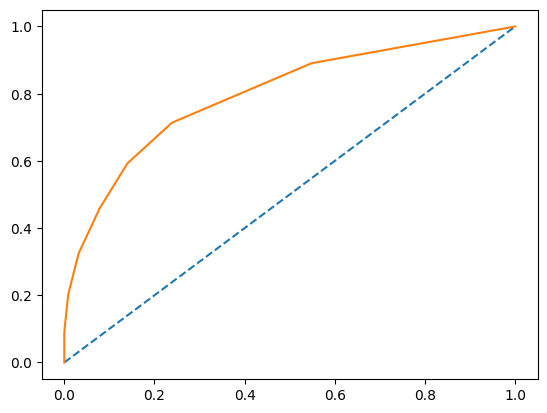

In [595]:
probs_knncvtrain = best_grid.predict_proba(X_train)
probs_knncvtrain = probs_knncvtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_knncvtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_knncvtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.766


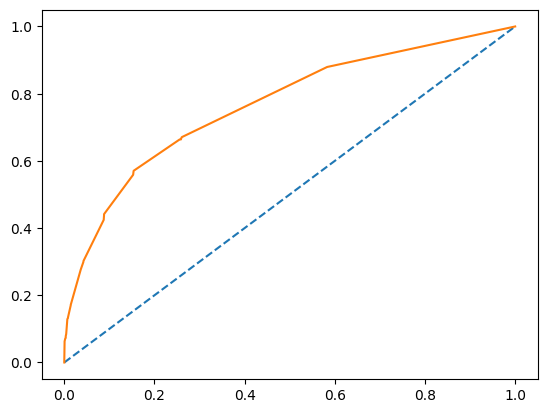

In [596]:
probs_knncvtest = best_grid.predict_proba(X_test)
probs_knncvtest = probs_knncvtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_knncvtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_knncvtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [597]:
print("cross validation scores for train dataset")
scores_knncv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_knncv_train

cross validation scores for train dataset


array([0.83776933, 0.84157161, 0.83502538, 0.84517766, 0.84010152,
       0.84137056, 0.85786802, 0.85532995, 0.83629442, 0.83502538])

In [598]:
print("cross validation scores for test dataset")
scores_knncv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_knncv_test

cross validation scores for test dataset


array([0.84023669, 0.83431953, 0.82248521, 0.83431953, 0.82840237,
       0.84615385, 0.83431953, 0.80473373, 0.82492582, 0.83086053])

KNN - SMOTE

In [599]:
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=19)

In [600]:
y_train_predict_knnsm = knn.predict(X_train_res)
y_test_predict_knnsm = knn.predict(X_test)

In [601]:
print("Accuracy of training dataset:",knn.score(X_train_res, y_train_res))
print("Accuracy of testing dataset:",knn.score(X_test, y_test))

Accuracy of training dataset: 0.7321673003802281
Accuracy of testing dataset: 0.7045589105979869


In [602]:
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, y_train_predict_knnsm)

confusion matrix for training dataset


array([[4781, 1794],
       [1728, 4847]])

In [603]:
print("confusion matrix for testing dataset")
confusion_matrix(y_test, y_test_predict_knnsm)

confusion matrix for testing dataset


array([[1975,  814],
       [ 184,  405]])

In [604]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res, y_train_predict_knnsm),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_knnsm),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.73      0.73      6575
           1       0.73      0.74      0.73      6575

    accuracy                           0.73     13150
   macro avg       0.73      0.73      0.73     13150
weighted avg       0.73      0.73      0.73     13150
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.71      0.80      2789
           1       0.33      0.69      0.45       589

    accuracy                           0.70      3378
   macro avg       0.62      0.70      0.62      3378
weighted avg       0.81      0.70      0.74      3378
 



AUC score and ROC curve for training dataset
AUC: 0.801


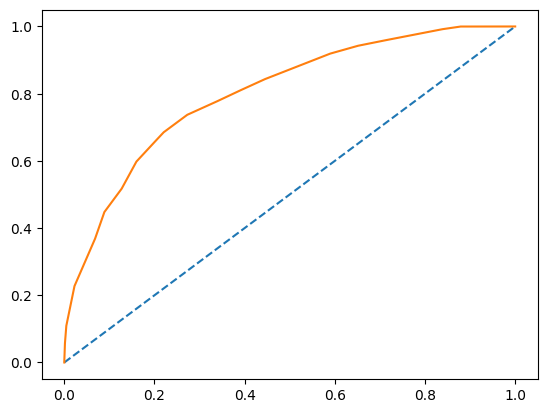

In [605]:
probs_knnsmtrain = knn.predict_proba(X_train_res)
probs_knnsmtrain = probs_knnsmtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs_knnsmtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs_knnsmtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.762


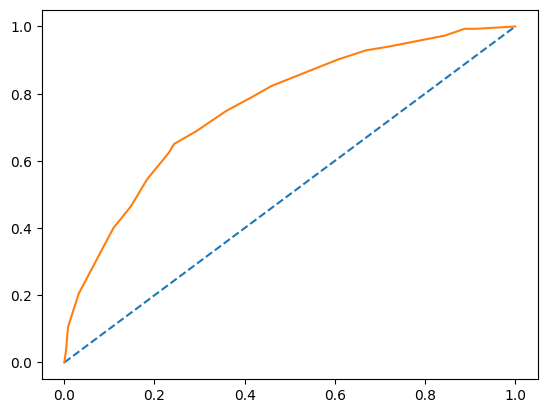

In [606]:
probs_knnsmtest = knn.predict_proba(X_test)
probs_knnsmtest = probs_knnsmtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_knnsmtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_knnsmtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [607]:
print("cross validation scores for train dataset")
scores_knnsm_train = cross_val_score(knn, X_train_res, y_train_res, cv=10)
scores_knnsm_train

cross validation scores for train dataset


array([0.69581749, 0.73536122, 0.72319392, 0.69961977, 0.70190114,
       0.71406844, 0.73688213, 0.71787072, 0.69277567, 0.72091255])

In [608]:
print("cross validation scores for test dataset")
scores_knnsm_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knnsm_test

cross validation scores for test dataset


array([0.83727811, 0.83431953, 0.83727811, 0.82840237, 0.83727811,
       0.83136095, 0.82544379, 0.81952663, 0.83382789, 0.82195846])

#Gaussian Naive Bayes

In [609]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [610]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [611]:
y_train_predict_nb = nb.predict(X_train)
y_test_predict_nb = nb.predict(X_test)

print("Accuracy of training dataset:", nb.score(X_train, y_train))
print("Accuracy of testing dataset:", nb.score(X_test, y_test))

Accuracy of training dataset: 0.289266683582847
Accuracy of testing dataset: 0.283303730017762


In [612]:
print("confusion matrix for training dataset")
confusion_matrix(y_train, y_train_predict_nb)

confusion matrix for training dataset


array([[1047, 5528],
       [  74, 1233]])

In [613]:
print("confusion matrix for testing dataset")
confusion_matrix(y_test, y_test_predict_nb)

confusion matrix for testing dataset


array([[ 408, 2381],
       [  40,  549]])

In [614]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_nb),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_nb),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      0.16      0.27      6575
           1       0.18      0.94      0.31      1307

    accuracy                           0.29      7882
   macro avg       0.56      0.55      0.29      7882
weighted avg       0.81      0.29      0.28      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.15      0.25      2789
           1       0.19      0.93      0.31       589

    accuracy                           0.28      3378
   macro avg       0.55      0.54      0.28      3378
weighted avg       0.78      0.28      0.26      3378
 



AUC score and ROC curve for training dataset
AUC: 0.719


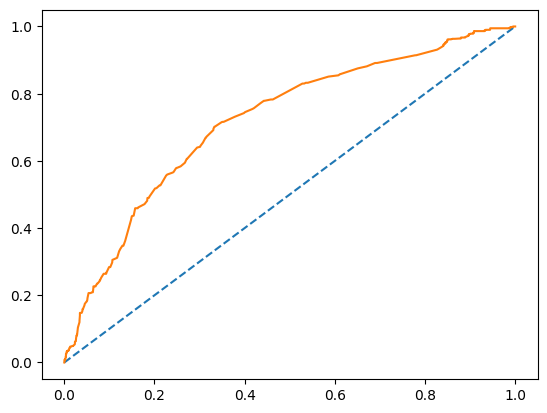

In [615]:
probs_nbtrain = nb.predict_proba(X_train)
probs_nbtrain = probs_nbtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_nbtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_nbtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.705


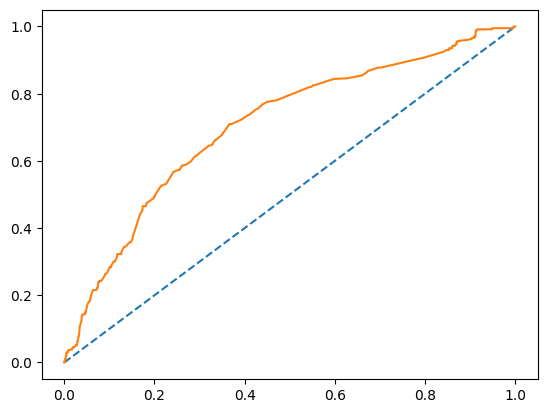

In [616]:
probs_nbtest = nb.predict_proba(X_test)
probs_nbtest = probs_nbtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_nbtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_nbtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [617]:
print("cross validation scores for train dataset")
scores_nb_train = cross_val_score(nb, X_train, y_train, cv=10)
scores_nb_train

cross validation scores for train dataset


array([0.29024081, 0.30798479, 0.27664975, 0.27918782, 0.30076142,
       0.28553299, 0.28045685, 0.29949239, 0.28172589, 0.28807107])

In [618]:
print("cross validation scores for test dataset")
scores_nb_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nb_test

cross validation scores for test dataset


array([0.75147929, 0.71005917, 0.73076923, 0.70414201, 0.73668639,
       0.78698225, 0.71301775, 0.73668639, 0.70919881, 0.71810089])

Gaussian Naive Bayes - SMOTE

In [619]:
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

GaussianNB()

In [620]:
y_train_predict_nbsm = nb.predict(X_train_res)
y_test_predict_nbsm = nb.predict(X_test)

print("Accuracy of training dataset:", nb.score(X_train_res, y_train_res))
print("Accuracy of testing dataset:", nb.score(X_test, y_test))

Accuracy of training dataset: 0.5628136882129278
Accuracy of testing dataset: 0.2895204262877442


In [621]:
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train_res, y_train_predict_nbsm))

Confusion matrix of train dataset
[[1092 5483]
 [ 266 6309]]


In [622]:
print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, y_test_predict_nbsm))

Confusion matrix of test dataset
[[ 434 2355]
 [  45  544]]


In [623]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res, y_train_predict_nbsm),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_nbsm),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.17      0.28      6575
           1       0.54      0.96      0.69      6575

    accuracy                           0.56     13150
   macro avg       0.67      0.56      0.48     13150
weighted avg       0.67      0.56      0.48     13150
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.16      0.27      2789
           1       0.19      0.92      0.31       589

    accuracy                           0.29      3378
   macro avg       0.55      0.54      0.29      3378
weighted avg       0.78      0.29      0.27      3378
 



AUC score and ROC curve for training dataset
AUC: 0.730


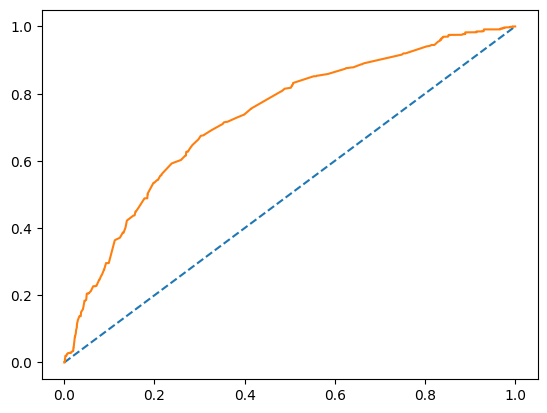

In [624]:
probs_nbsmtrain = nb.predict_proba(X_train_res)
probs_nbsmtrain = probs_nbsmtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs_nbsmtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs_nbsmtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.706


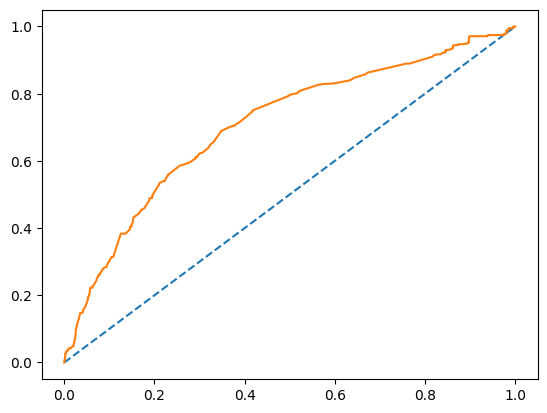

In [625]:
probs_nbsmtest = nb.predict_proba(X_test)
probs_nbsmtest = probs_nbsmtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_nbsmtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_nbsmtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [626]:
print("cross validation scores for train dataset")
scores_nbsm_train = cross_val_score(nb, X_train_res, y_train_res, cv=10)
scores_nbsm_train

cross validation scores for train dataset


array([0.54904943, 0.55589354, 0.55969582, 0.56653992, 0.57490494,
       0.56121673, 0.55969582, 0.57262357, 0.5634981 , 0.56501901])

In [627]:
print("cross validation scores for test dataset")
scores_nbsm_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nbsm_test

cross validation scores for test dataset


array([0.75147929, 0.71005917, 0.73076923, 0.70414201, 0.73668639,
       0.78698225, 0.71301775, 0.73668639, 0.70919881, 0.71810089])

#Random Forest

In [628]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [629]:
y_train_predict_rf = rf.predict(X_train)
y_test_predict_rf = rf.predict(X_test)

print("Accuracy score for training dataset:",rf.score(X_train, y_train))
print("Accuracy score for testing dataset:",rf.score(X_test, y_test))

Accuracy score for training dataset: 0.8623445825932504
Accuracy score for testing dataset: 0.8436944937833037


In [630]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, y_train_predict_rf))

confusion matrix for training dataset
[[6437  138]
 [ 947  360]]


In [631]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_rf))

confusion matrix for testing dataset
[[2709   80]
 [ 448  141]]


In [632]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_rf),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_rf),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6575
           1       0.72      0.28      0.40      1307

    accuracy                           0.86      7882
   macro avg       0.80      0.63      0.66      7882
weighted avg       0.85      0.86      0.84      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2789
           1       0.64      0.24      0.35       589

    accuracy                           0.84      3378
   macro avg       0.75      0.61      0.63      3378
weighted avg       0.82      0.84      0.81      3378
 



AUC score and ROC curve for training dataset
AUC: 0.837


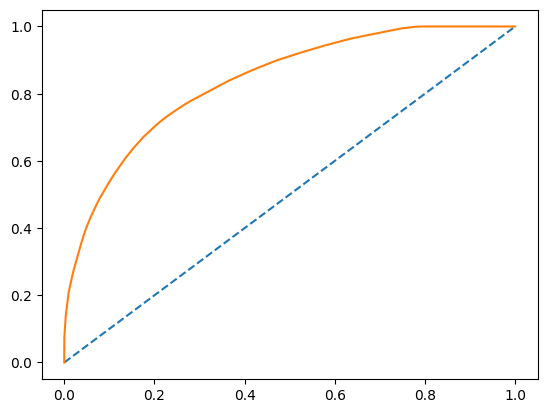

In [633]:
probs_rftrain = rf.predict_proba(X_train)
probs_rftrain = probs_rftrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_rftrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_rftrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.795


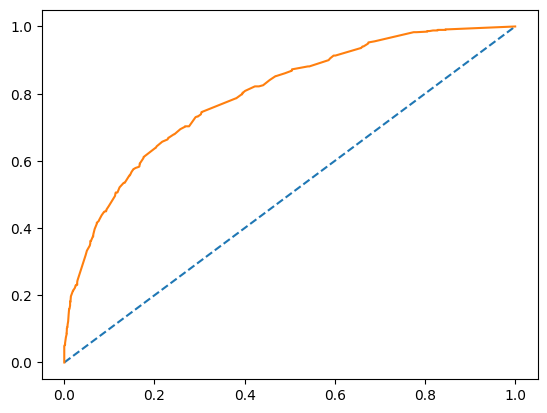

In [634]:
probs_rftest = rf.predict_proba(X_test)
probs_rftest = probs_rftest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_rftest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_rftest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [635]:
print("cross validation scores for train dataset")
scores_rf_train = cross_val_score(rf, X_train, y_train, cv=10)
scores_rf_train

cross validation scores for train dataset


array([0.84537389, 0.84283904, 0.84137056, 0.84517766, 0.84898477,
       0.86167513, 0.85786802, 0.86040609, 0.85152284, 0.83883249])

In [636]:
print("cross validation scores for test dataset")
scores_rf_test = cross_val_score(rf, X_test, y_test, cv=10)
scores_rf_test

cross validation scores for test dataset


array([0.85207101, 0.82544379, 0.81952663, 0.85207101, 0.83727811,
       0.84023669, 0.84911243, 0.82248521, 0.84569733, 0.83382789])

Random forest - SMOTE

In [637]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [638]:
y_train_predict_rfsm = rf.predict(X_train_res)
y_test_predict_rfsm = rf.predict(X_test)

print("Accuracy score for training dataset:",rf.score(X_train_res, y_train_res))
print("Accuracy score for testing dataset:",rf.score(X_test, y_test))

Accuracy score for training dataset: 0.7479847908745247
Accuracy score for testing dataset: 0.7309058614564832


In [639]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, y_train_predict_rfsm))

confusion matrix for training dataset
[[5048 1527]
 [1787 4788]]


In [640]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_rfsm))

confusion matrix for testing dataset
[[2070  719]
 [ 190  399]]


In [641]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res, y_train_predict_rfsm),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_rfsm))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.77      0.75      6575
           1       0.76      0.73      0.74      6575

    accuracy                           0.75     13150
   macro avg       0.75      0.75      0.75     13150
weighted avg       0.75      0.75      0.75     13150
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.92      0.74      0.82      2789
           1       0.36      0.68      0.47       589

    accuracy                           0.73      3378
   macro avg       0.64      0.71      0.64      3378
weighted avg       0.82      0.73      0.76      3378



AUC score and ROC curve for training dataset
AUC: 0.831


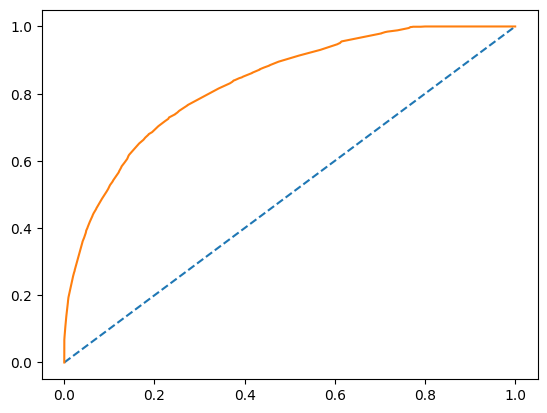

In [642]:
probs_rfsmtrain = rf.predict_proba(X_train)
probs_rfsmtrain = probs_rfsmtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_rfsmtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_rfsmtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.785


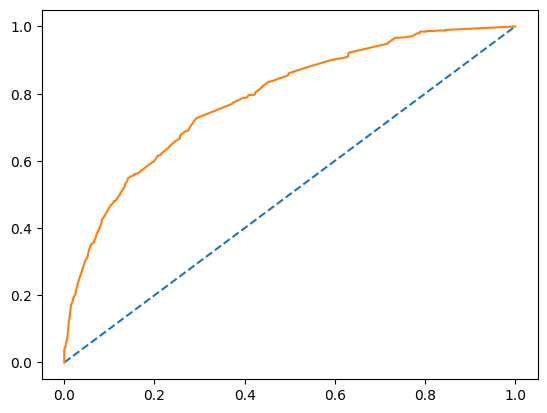

In [643]:
probs_rfsmtest = rf.predict_proba(X_test)
probs_rfsmtest = probs_rfsmtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_rfsmtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_rfsmtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [644]:
print("cross validation scores for train dataset")
scores_rfsm_train = cross_val_score(rf, X_train_res, y_train_res, cv=10)
scores_rfsm_train

cross validation scores for train dataset


array([0.73612167, 0.75969582, 0.74524715, 0.72471483, 0.72851711,
       0.7460076 , 0.75209125, 0.73612167, 0.74448669, 0.75513308])

In [645]:
print("cross validation scores for test dataset")
scores_rfsm_test = cross_val_score(rf, X_test, y_test, cv=10)
scores_rfsm_test

cross validation scores for test dataset


array([0.85207101, 0.82544379, 0.81952663, 0.85207101, 0.83727811,
       0.84023669, 0.84911243, 0.82248521, 0.84569733, 0.83382789])

#Bagging

In [646]:
from sklearn.ensemble import BaggingClassifier
Bagging=BaggingClassifier(base_estimator=rf,random_state=1)
Bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  random_state=1)

In [647]:
y_train_predict_bagging = Bagging.predict(X_train)
y_test_predict_bagging = Bagging.predict(X_test)

print("Accuracy score or training dataset:",Bagging.score(X_train, y_train))
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

Accuracy score or training dataset: 0.8614564831261101
Accuracy score for testing datatset: 0.844582593250444


In [648]:
print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train, y_train_predict_bagging))

confusion report for training dataset
[[6436  139]
 [ 953  354]]


In [649]:
print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_bagging))

confusuion matrix for testing dataset
[[2710   79]
 [ 446  143]]


In [650]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_bagging),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_bagging))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6575
           1       0.72      0.27      0.39      1307

    accuracy                           0.86      7882
   macro avg       0.79      0.62      0.66      7882
weighted avg       0.85      0.86      0.83      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2789
           1       0.64      0.24      0.35       589

    accuracy                           0.84      3378
   macro avg       0.75      0.61      0.63      3378
weighted avg       0.82      0.84      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.834


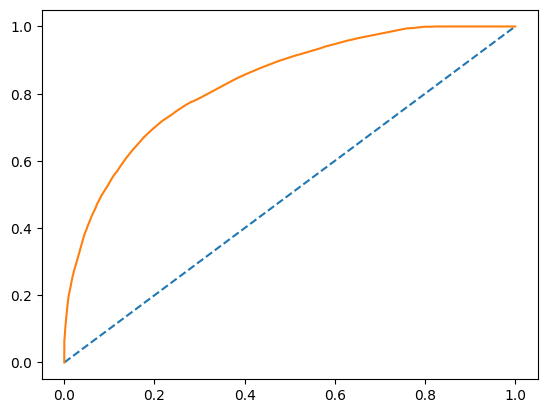

In [651]:
probs_bagtrain = Bagging.predict_proba(X_train)
probs_bagtrain = probs_bagtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_bagtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_bagtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.788


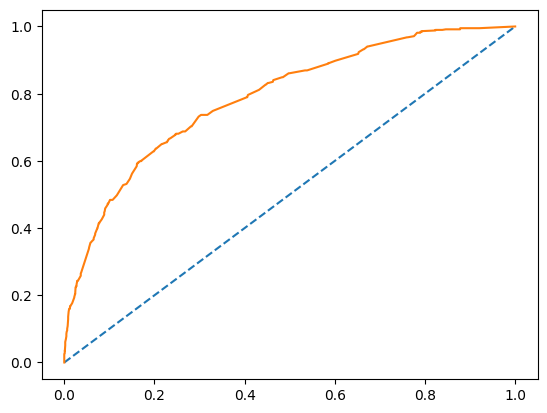

In [652]:
probs_bagtest = Bagging.predict_proba(X_test)
probs_bagtest = probs_bagtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_bagtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_bagtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [653]:
print("cross validation scores for train dataset")
scores_bagging_train = cross_val_score(Bagging, X_train, y_train, cv=10)
scores_bagging_train

cross validation scores for train dataset


array([0.84664132, 0.84283904, 0.84010152, 0.84263959, 0.85152284,
       0.86675127, 0.85532995, 0.84898477, 0.85152284, 0.84390863])

In [654]:
print("cross validation scores for test dataset")
scores_bagging_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_test

cross validation scores for test dataset


array([0.84319527, 0.82840237, 0.82544379, 0.84615385, 0.84319527,
       0.83431953, 0.84911243, 0.82248521, 0.84569733, 0.83382789])

Bagging - SMOTE

In [655]:
Bagging.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  random_state=1)

In [656]:
y_train_predict_bagging_sm = Bagging.predict(X_train_res)
y_test_predict_bagging_sm= Bagging.predict(X_test)

print("Accuracy score or training dataset:",Bagging.score(X_train_res, y_train_res))
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

Accuracy score or training dataset: 0.7479847908745247
Accuracy score for testing datatset: 0.7223208999407934


In [657]:
print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train_res, y_train_predict_bagging_sm))

confusion report for training dataset
[[4954 1621]
 [1693 4882]]


In [658]:
print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_bagging_sm))

confusuion matrix for testing dataset
[[2035  754]
 [ 184  405]]


In [659]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res, y_train_predict_bagging_sm),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_bagging_sm))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.75      0.75      6575
           1       0.75      0.74      0.75      6575

    accuracy                           0.75     13150
   macro avg       0.75      0.75      0.75     13150
weighted avg       0.75      0.75      0.75     13150
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.92      0.73      0.81      2789
           1       0.35      0.69      0.46       589

    accuracy                           0.72      3378
   macro avg       0.63      0.71      0.64      3378
weighted avg       0.82      0.72      0.75      3378



AUC score and ROC curve for training dataset
AUC: 0.833


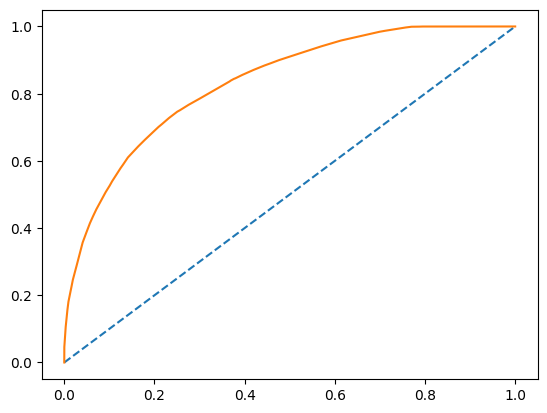

In [660]:
probs_bagsmtrain = Bagging.predict_proba(X_train_res)
probs_bagsmtrain = probs_bagsmtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs_bagsmtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs_bagsmtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.781


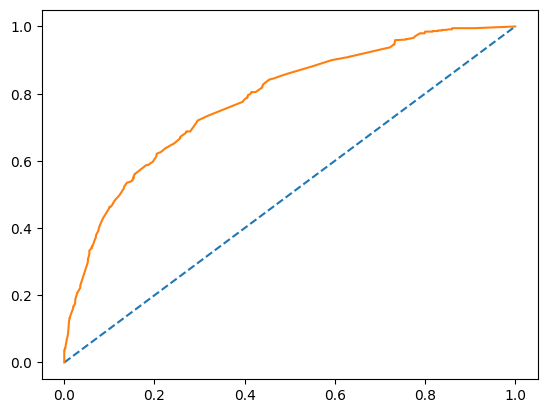

In [661]:
probs_bagsmtest = Bagging.predict_proba(X_test)
probs_bagsmtest = probs_bagsmtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_bagsmtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_bagsmtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [662]:
print("cross validation scores for train dataset")
scores_bagging_sm_train = cross_val_score(Bagging, X_train_res, y_train_res, cv=10)
scores_bagging_sm_train

cross validation scores for train dataset


array([0.7338403 , 0.75893536, 0.74448669, 0.72471483, 0.7269962 ,
       0.74752852, 0.74828897, 0.73764259, 0.74220532, 0.75665399])

In [663]:
print("cross validation scores for test dataset")
scores_bagging_sm_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_sm_test

cross validation scores for test dataset


array([0.84319527, 0.82840237, 0.82544379, 0.84615385, 0.84319527,
       0.83431953, 0.84911243, 0.82248521, 0.84569733, 0.83382789])

#Ada-Boost

In [664]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)
adb.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [665]:
y_train_predict_adb = adb.predict(X_train)
y_test_predict_adb = adb.predict(X_test)

print("Accuracy for training dataset:",adb.score(X_train, y_train))
print("Accuracy score for testing dataset:",adb.score(X_test, y_test))

Accuracy for training dataset: 0.8392539964476021
Accuracy score for testing dataset: 0.8312611012433393


In [666]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, y_train_predict_adb))

confusion matrix for training dataset
[[6481   94]
 [1173  134]]


In [667]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_adb))

confusion matrix for testing dataset
[[2747   42]
 [ 528   61]]


In [668]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_adb),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_adb))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.99      0.91      6575
           1       0.59      0.10      0.17      1307

    accuracy                           0.84      7882
   macro avg       0.72      0.54      0.54      7882
weighted avg       0.80      0.84      0.79      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.84      0.98      0.91      2789
           1       0.59      0.10      0.18       589

    accuracy                           0.83      3378
   macro avg       0.72      0.54      0.54      3378
weighted avg       0.80      0.83      0.78      3378



AUC score and ROC curve for training dataset
AUC: 0.751


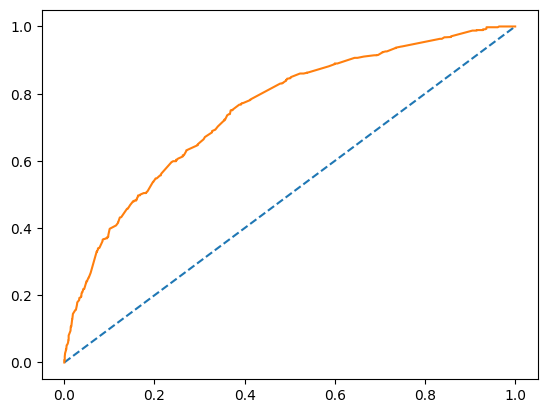

In [669]:
probs_abdtrain = adb.predict_proba(X_train)
probs_abdtrain = probs_abdtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_abdtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_abdtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.748


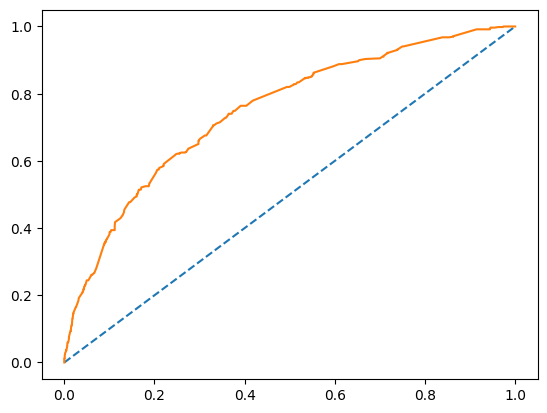

In [670]:
probs_abdtest = adb.predict_proba(X_test)
probs_abdtest = probs_abdtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_abdtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_abdtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [671]:
print("cross validation scores for train dataset")
scores_adb_train = cross_val_score(adb, X_train, y_train, cv=10)
scores_adb_train

cross validation scores for train dataset


array([0.83776933, 0.83269962, 0.84010152, 0.83248731, 0.8464467 ,
       0.84137056, 0.82994924, 0.8464467 , 0.83756345, 0.83629442])

In [672]:
print("cross validation scores for test dataset")
scores_adb_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_test

cross validation scores for test dataset


array([0.84319527, 0.82248521, 0.81952663, 0.86982249, 0.84023669,
       0.83136095, 0.84023669, 0.82544379, 0.83679525, 0.83086053])

Ada-Boost - SMOTE

In [673]:
adb.fit(X_train_res,y_train_res)

AdaBoostClassifier(random_state=42)

In [674]:
y_train_predict_adbsm = adb.predict(X_train_res)
y_test_predict_adbsm = adb.predict(X_test)

print("Accuracy for training dataset:",adb.score(X_train_res, y_train_res))
print("Accuracy score for testing dataset:",adb.score(X_test, y_test))

Accuracy for training dataset: 0.6797718631178707
Accuracy score for testing dataset: 0.6755476613380699


In [675]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, y_train_predict_adbsm))

confusion matrix for training dataset
[[4444 2131]
 [2080 4495]]


In [676]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_adbsm))

confusion matrix for testing dataset
[[1874  915]
 [ 181  408]]


In [677]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res, y_train_predict_adbsm),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_adbsm))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.68      0.68      0.68      6575
           1       0.68      0.68      0.68      6575

    accuracy                           0.68     13150
   macro avg       0.68      0.68      0.68     13150
weighted avg       0.68      0.68      0.68     13150
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.67      0.77      2789
           1       0.31      0.69      0.43       589

    accuracy                           0.68      3378
   macro avg       0.61      0.68      0.60      3378
weighted avg       0.81      0.68      0.71      3378



AUC score and ROC curve for training dataset
AUC: 0.753


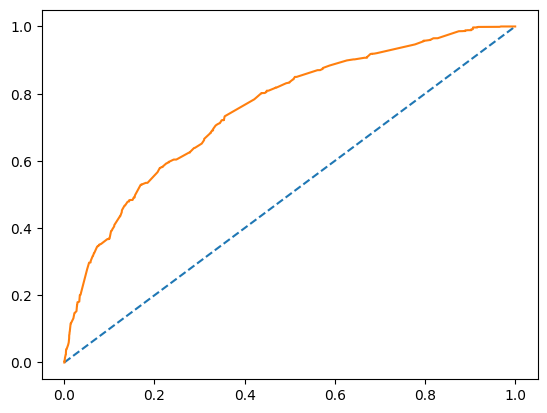

In [678]:
probs_adbsmtrain = adb.predict_proba(X_train_res)
probs_adbsmtrain = probs_adbsmtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs_adbsmtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs_adbsmtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.741


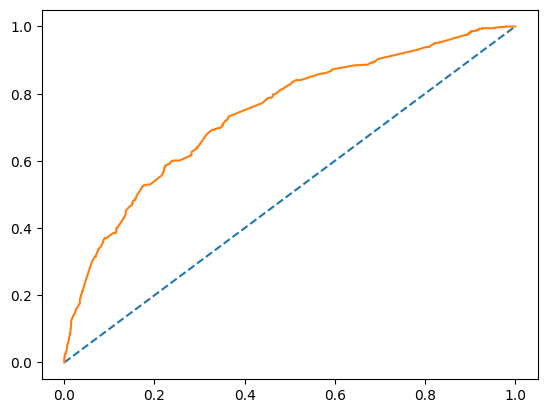

In [679]:
probs_adbsmtest = adb.predict_proba(X_test)
probs_adbsmtest = probs_adbsmtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_adbsmtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_adbsmtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [680]:
print("cross validation scores for train dataset")
scores_adb_sm_train = cross_val_score(adb, X_train_res, y_train_res, cv=10)
scores_adb_sm_train

cross validation scores for train dataset


array([0.67376426, 0.68897338, 0.67680608, 0.67224335, 0.6730038 ,
       0.65779468, 0.6851711 , 0.67756654, 0.66996198, 0.70418251])

In [681]:
print("cross validation scores for test dataset")
scores_adb_sm_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_sm_test

cross validation scores for test dataset


array([0.84319527, 0.82248521, 0.81952663, 0.86982249, 0.84023669,
       0.83136095, 0.84023669, 0.82544379, 0.83679525, 0.83086053])

#Gradient Boosting

In [682]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [683]:
y_train_predict_gb = gb.predict(X_train)
y_test_predict_gb = gb.predict(X_test)

print("Accuracy for training dataset:", gb.score(X_train, y_train))
print("Accuracy score for testing dataset:", gb.score(X_test, y_test))

Accuracy for training dataset: 0.8471200202994164
Accuracy score for testing dataset: 0.8386619301361753


In [684]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, y_train_predict_gb))

confusion matrix for training dataset
[[6468  107]
 [1098  209]]


In [685]:
print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_gb))

confusuon matrix for testing dataset
[[2740   49]
 [ 496   93]]


In [686]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict_gb),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_gb))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      6575
           1       0.66      0.16      0.26      1307

    accuracy                           0.85      7882
   macro avg       0.76      0.57      0.59      7882
weighted avg       0.82      0.85      0.81      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2789
           1       0.65      0.16      0.25       589

    accuracy                           0.84      3378
   macro avg       0.75      0.57      0.58      3378
weighted avg       0.81      0.84      0.80      3378



AUC score and ROC curve for training dataset
AUC: 0.780


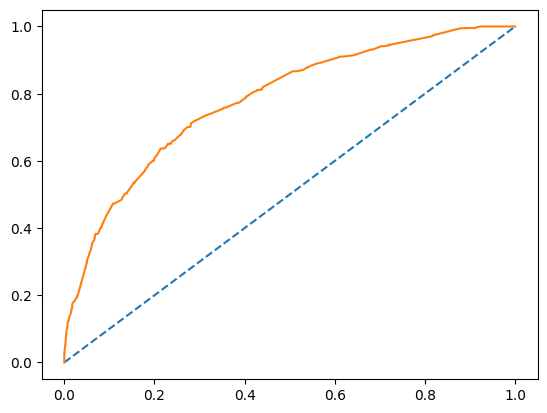

In [687]:
probs_gbtrain = gb.predict_proba(X_train)
probs_gbtrain = probs_gbtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs_gbtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_gbtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.770


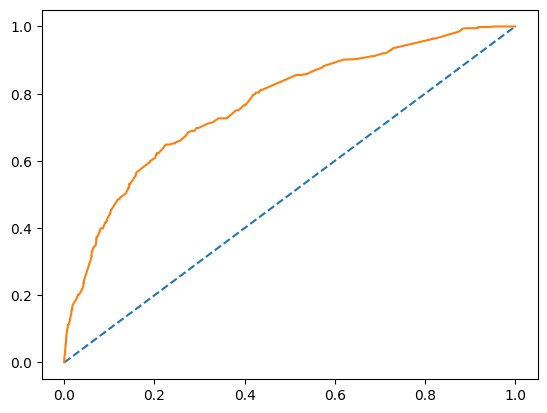

In [688]:
probs_gbtest = gb.predict_proba(X_test)
probs_gbtest = probs_gbtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_gbtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_gbtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [689]:
print("cross validation scores for train dataset")
scores_gb_train = cross_val_score(gb, X_train, y_train, cv=10)
scores_gb_train

cross validation scores for train dataset


array([0.83776933, 0.84283904, 0.84390863, 0.84517766, 0.8464467 ,
       0.85025381, 0.83629442, 0.85279188, 0.83756345, 0.84263959])

In [690]:
print("cross validation scores for test dataset")
scores_gb_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_test

cross validation scores for test dataset


array([0.84319527, 0.83431953, 0.81952663, 0.86982249, 0.83431953,
       0.84615385, 0.84023669, 0.83136095, 0.83976261, 0.83382789])

Gradient Boosting - SMOTE

In [691]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

In [692]:
y_train_predict_gbsm = gb.predict(X_train_res)
y_test_predict_gbsm = gb.predict(X_test)

print("Accuracy for training dataset:", gb.score(X_train_res, y_train_res))
print("Accuracy score for testing dataset:", gb.score(X_test, y_test))

Accuracy for training dataset: 0.7104942965779467
Accuracy score for testing dataset: 0.7235050325636472


In [693]:
print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, y_train_predict_gbsm))

confusion matrix for training dataset
[[4936 1639]
 [2168 4407]]


In [694]:
print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, y_test_predict_gbsm))

confusuon matrix for testing dataset
[[2060  729]
 [ 205  384]]


In [695]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res, y_train_predict_gbsm),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict_gbsm))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.75      0.72      6575
           1       0.73      0.67      0.70      6575

    accuracy                           0.71     13150
   macro avg       0.71      0.71      0.71     13150
weighted avg       0.71      0.71      0.71     13150
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.74      0.82      2789
           1       0.35      0.65      0.45       589

    accuracy                           0.72      3378
   macro avg       0.63      0.70      0.63      3378
weighted avg       0.81      0.72      0.75      3378



AUC score and ROC curve for training dataset
AUC: 0.784


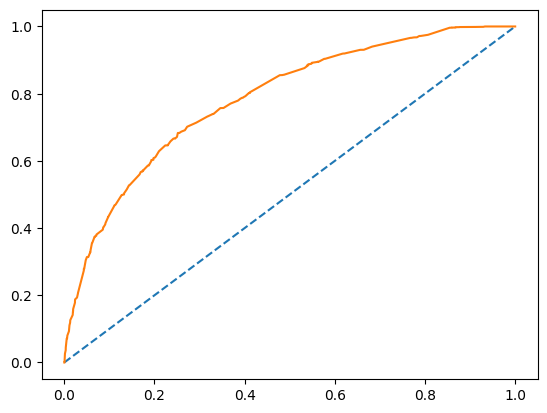

In [696]:
probs_gbsmtrain = gb.predict_proba(X_train_res)
probs_gbsmtrain = probs_gbsmtrain[:, 1]
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs_gbsmtrain)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs_gbsmtrain)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.760


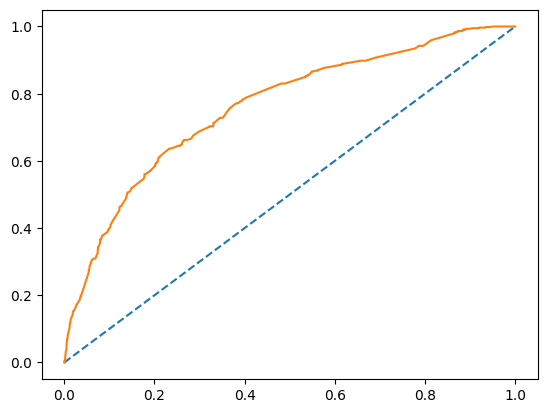

In [697]:
probs_gbsmtest = gb.predict_proba(X_test)
probs_gbsmtest = probs_gbsmtest[:, 1]
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs_gbsmtest)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_gbsmtest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [698]:
print("cross validation scores for train dataset")
scores_gb_sm_train = cross_val_score(gb, X_train_res, y_train_res, cv=10)
scores_gb_sm_train

cross validation scores for train dataset


array([0.70798479, 0.71634981, 0.70798479, 0.69657795, 0.69885932,
       0.69201521, 0.71254753, 0.70874525, 0.70494297, 0.72851711])

In [699]:
print("cross validation scores for test dataset")
scores_gb_sm_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_sm_test

cross validation scores for test dataset


array([0.84319527, 0.83431953, 0.81952663, 0.86982249, 0.83431953,
       0.84615385, 0.84023669, 0.83136095, 0.83976261, 0.83382789])